In [11]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from kneed import KneeLocator
import plotly.express as px
import sys
from random import randint
sns.set_palette("colorblind")

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

In [1]:
# volumes_cavs08agrou6.dat volumes_cavs08agrou615.dat volumes_cavs08agrou625.dat volumes_cavs08agrou65.dat volumes_cavs08agrou67.dat 
volumes = pd.read_csv('reformat_volumes_cavs08agrou6.dat',skiprows=[0], sep = " ", index_col=1)
volumes= volumes.add_prefix('cav_')
volumes = volumes.iloc[:,1:]
volumes = volumes.T

NameError: name 'pd' is not defined

In [13]:
volumes_transposed = volumes.T
volumes_transposed = volumes_transposed.iloc[:-1,:]
volumes_transposed['max_value'] = volumes_transposed.max(axis=1)
volumes_transposed['mean_volume'] = volumes_transposed.mean(axis=1)
volumes_transposed = volumes_transposed.sort_values(by=['mean_volume'])
volumes_transposed = volumes_transposed.iloc[:-1,:]
volumes_transposed = volumes_transposed.iloc[1:,:]
volumes_transposed = volumes_transposed.T
volumes_transposed

cav_208    cav_204    cav_172    cav_144  cav_156    cav_122  \
1              0.000   0.000000   0.000000   0.000000      0.0   0.000000   
2              0.000   0.000000   0.000000   0.000000      0.0   0.000000   
3              0.000   0.000000   0.000000   0.000000      0.0   0.000000   
4              0.000   0.000000   0.000000   0.000000      0.0   0.000000   
5              0.000   0.000000   0.000000   0.000000      0.0   0.000000   
...              ...        ...        ...        ...      ...        ...   
65             0.000   0.000000   0.000000   0.000000      0.0   0.000000   
66             0.000   0.000000   0.000000   0.000000      0.0   0.000000   
67             0.000   0.000000   0.000000   0.000000      0.0   0.000000   
max_value     12.750  14.000000  14.120000  14.250000     17.0  17.500000   
mean_volume    0.375   0.411765   0.415294   0.419118      0.5   0.514706   

             cav_101  cav_140    cav_230     cav_90  ...     cav_106  \
1             0.0000   0.0000   0.000000   0.000000  ...  175.380000   
2             0.0000   0.0000   0.000000   0.000000  ...  209.620000   
3             0.0000   0.0000   0.000000   0.000000  ...  423.250000   
4             0.0000   0.0000   0.000000   0.000000  ...  448.380000   
5             0.0000   0.0000   0.000000   0.000000  ...  525.620000   
...              ...      ...        ...        ...  ...         ...   
65            0.0000   0.0000   0.000000   0.000000  ...  357.120000   
66            0.0000   0.0000   0.000000   0.000000  ...  186.380000   
67            0.0000   0.0000   0.000000   0.000000  ...  175.380000   
max_value    12.7500  12.7500  19.750000  20.120000  ...  797.880000   
mean_volume   0.5625   0.5625   0.580882   0.591765  ...  214.884559   

                cav_145       cav_3  cav_123     cav_233     cav_235  \
1            164.880000  107.380000   39.750  287.380000  388.000000   
2            176.120000  105.250000  108.880  272.880000  386.250000   
3            198.500000  109.000000  309.250  271.500000  374.880000   
4            271.500000  109.620000  429.620  270.000000  386.750000   
5            256.500000  146.500000  390.250  250.750000  429.380000   
...                 ...         ...      ...         ...         ...   
65           122.250000  104.500000  153.750  282.620000  385.750000   
66           192.880000  106.620000   36.880  277.380000  385.250000   
67           164.880000  107.380000   39.750  287.380000  388.000000   
max_value    594.250000  394.500000  557.250  367.880000  541.880000   
mean_volume  226.124853  232.977647  235.195  256.891765  366.842647   

                cav_210      cav_73     cav_186     cav_242  
1            484.620000    0.000000  595.620000  655.250000  
2            448.250000   19.120000  607.500000  543.620000  
3            475.250000  404.120000  609.250000  566.120000  
4            455.750000  455.880000  631.750000  704.120000  
5            432.880000  482.620000  666.620000  833.750000  
...                 ...         ...         ...         ...  
65           449.750000   14.120000  648.000000  655.250000  
66           438.880000    0.000000  603.750000  628.000000  
67           484.620000    0.000000  595.620000  655.250000  
max_value    498.620000  739.880000  826.380000  988.380000  
mean_volume  378.405882  409.999559  554.309265  665.795882  

[69 rows x 253 columns]

In [14]:
color = []
n = 254
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF)) 

# add to df color codes
last_row = volumes_transposed.iloc[-1]
list_w_colors = []
for i in range(len(last_row)):
    if last_row[i] < 100:
        list_w_colors.append('#C1CDCD')
    elif last_row[i] > 100:
        list_w_colors.append(color[i])

volumes_color_codes_mean = volumes_transposed.append(pd.Series(list_w_colors, index = volumes_transposed.columns), ignore_index=True)
volumes_color_codes_mean

cav_208   cav_204   cav_172   cav_144  cav_156   cav_122  cav_101  \
0       0.0       0.0       0.0       0.0      0.0       0.0      0.0   
1       0.0       0.0       0.0       0.0      0.0       0.0      0.0   
2       0.0       0.0       0.0       0.0      0.0       0.0      0.0   
3       0.0       0.0       0.0       0.0      0.0       0.0      0.0   
4       0.0       0.0       0.0       0.0      0.0       0.0      0.0   
..      ...       ...       ...       ...      ...       ...      ...   
65      0.0       0.0       0.0       0.0      0.0       0.0      0.0   
66      0.0       0.0       0.0       0.0      0.0       0.0      0.0   
67    12.75      14.0     14.12     14.25     17.0      17.5    12.75   
68    0.375  0.411765  0.415294  0.419118      0.5  0.514706   0.5625   
69  #C1CDCD   #C1CDCD   #C1CDCD   #C1CDCD  #C1CDCD   #C1CDCD  #C1CDCD   

    cav_140   cav_230    cav_90  ...     cav_106     cav_145       cav_3  \
0       0.0       0.0       0.0  ...      175.38      164.88      107.38   
1       0.0       0.0       0.0  ...      209.62      176.12      105.25   
2       0.0       0.0       0.0  ...      423.25       198.5       109.0   
3       0.0       0.0       0.0  ...      448.38       271.5      109.62   
4       0.0       0.0       0.0  ...      525.62       256.5       146.5   
..      ...       ...       ...  ...         ...         ...         ...   
65      0.0       0.0       0.0  ...      186.38      192.88      106.62   
66      0.0       0.0       0.0  ...      175.38      164.88      107.38   
67    12.75     19.75     20.12  ...      797.88      594.25       394.5   
68   0.5625  0.580882  0.591765  ...  214.884559  226.124853  232.977647   
69  #C1CDCD   #C1CDCD   #C1CDCD  ...     #76516D     #8F2F15     #C4D5E2   

    cav_123     cav_233     cav_235     cav_210      cav_73     cav_186  \
0     39.75      287.38       388.0      484.62         0.0      595.62   
1    108.88      272.88      386.25      448.25       19.12       607.5   
2    309.25       271.5      374.88      475.25      404.12      609.25   
3    429.62       270.0      386.75      455.75      455.88      631.75   
4    390.25      250.75      429.38      432.88      482.62      666.62   
..      ...         ...         ...         ...         ...         ...   
65    36.88      277.38      385.25      438.88         0.0      603.75   
66    39.75      287.38       388.0      484.62         0.0      595.62   
67   557.25      367.88      541.88      498.62      739.88      826.38   
68  235.195  256.891765  366.842647  378.405882  409.999559  554.309265   
69  #1BBCEE     #FBD7FA     #2F6BAF     #8F2904     #2711C6     #2A025F   

       cav_242  
0       655.25  
1       543.62  
2       566.12  
3       704.12  
4       833.75  
..         ...  
65       628.0  
66      655.25  
67      988.38  
68  665.795882  
69     #5381F5  

[70 rows x 253 columns]

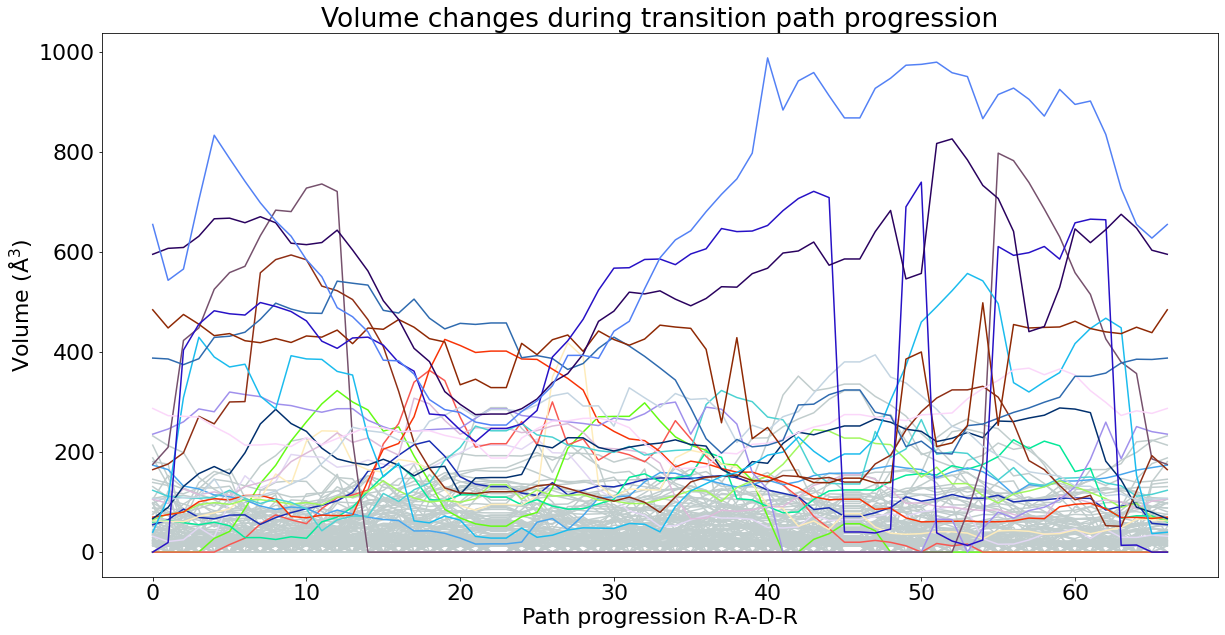

In [15]:
# plot all cavities volumes vs frame, 
volumes_plot = volumes_color_codes_mean[:-3]
volumes_plot.plot(color = volumes_color_codes_mean.iloc[-1],legend=False)
plt.xlabel("Path progression R-A-D-R")
plt.ylabel("Volume (Å$^3$)")

plt.savefig('extensionECD.png',bbox_inches='tight')
plt.title("Volume changes during transition path progression")

plt.savefig('cavitiy_mean_volumes_color.png',bbox_inches='tight')

In [16]:
volumes_transposed_transposed = volumes_transposed.T
volumes_transposed_transposed_selected = volumes_transposed_transposed[volumes_transposed_transposed['max_value'] > 150]
volumes_transposed_transposed_selected = volumes_transposed_transposed_selected.iloc[:,:-2]
volumes_transposed_transposed_selected

1       2       3       4       5       6       7       8   \
cav_52     0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_205  105.50  153.25  128.12  115.00  104.75   87.25   48.62   20.62   
cav_220  188.38  133.88   51.62   43.12   28.62    0.00    0.00    0.00   
cav_237   17.62    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_96     0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_124    0.00    0.00    0.00    0.00   22.62   62.75   63.12   82.50   
cav_222   33.88   30.50   17.00   16.50   14.00    0.00   12.50    0.00   
cav_35     0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_104    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_164   16.12   26.25   60.38  126.62  154.38  166.38  109.00   89.12   
cav_92     0.00    0.00    0.00    0.00    0.00    0.00    0.00  123.00   
cav_83     0.00    0.00    0.00   39.75   75.25  109.25  131.25  172.62   
cav_39     0.00    0.00    0.00    0.00   12.75   12.75   17.00    0.00   
cav_163    0.00    0.00   19.00   28.62   35.25   40.88   45.88   50.00   
cav_103  232.38  213.00  199.00  149.38  125.50  108.88   88.75   79.62   
cav_60     0.00    0.00    0.00   38.50   24.62   29.50   13.38   20.88   
cav_79   180.88  176.00   49.38   23.38   36.38   35.62   29.12   80.00   
cav_165   62.00   63.38   74.62   70.38   71.88   59.50   23.25    0.00   
cav_40     0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
cav_31     0.00    0.00   62.00   72.62    0.00   69.38   77.25   73.12   
cav_180   37.25   12.62   12.75   12.75    0.00    0.00   12.75    0.00   
cav_207  131.00  109.75   87.12   72.75   81.12   78.75   71.75   70.62   
cav_136    0.00    0.00   40.62   94.12   82.88   81.88   83.88   84.38   
cav_64    38.88   39.00   33.12   40.00   39.75   36.12   44.88   58.50   
cav_129  106.25   72.88   57.12   53.38   57.62   66.38   62.75   71.62   
cav_32   213.88  149.75   79.00  139.12  161.38  152.12   73.12   19.38   
cav_91    20.38    0.00    0.00   42.25   69.12   82.00   99.50  109.00   
cav_217   14.50   12.00   16.75   22.88   32.12   17.62   31.00   15.25   
cav_231   75.38  105.62   96.00  114.38  106.88  102.12  104.75   50.12   
cav_168   31.75   21.12   24.62   49.25   30.38  101.12  152.62  128.25   
cav_130    0.00    0.00    0.00    0.00   27.38   41.38   87.00  137.38   
cav_159    0.00    0.00    0.00    0.00    0.00   15.00   27.88   56.38   
cav_7     54.75   64.50   86.00   69.38   66.50   74.00   74.38   55.25   
cav_128   60.38   63.00   58.88   54.75   59.62   52.62   29.00   29.00   
cav_105  173.88  165.00  132.12  126.38  114.25  110.75  104.12   92.25   
cav_206   62.25   61.75   60.62   71.38   78.50   86.50  112.00  107.50   
cav_20    64.50   75.88   79.88   94.75   98.88   95.50  104.12  104.88   
cav_82   105.88   97.12  126.88  114.88  120.38  113.38  131.00  139.12   
cav_174   69.88   74.88   80.00  100.75  106.88  104.38  113.12  113.62   
cav_176  123.62  111.38  109.12  107.62  109.38  123.75  107.25   97.12   
cav_166  235.88  246.12  260.50  286.38  280.62  320.12  315.12  310.88   
cav_224   66.75   89.50  131.25  157.00  171.12  156.50  198.50  256.25   
cav_106  175.38  209.62  423.25  448.38  525.62  559.00  571.62  632.75   
cav_145  164.88  176.12  198.50  271.50  256.50  300.25  301.00  558.62   
cav_3    107.38  105.25  109.00  109.62  146.50   99.12  112.12  112.88   
cav_123   39.75  108.88  309.25  429.62  390.25  370.25  375.75  312.00   
cav_233  287.38  272.88  271.50  270.00  250.75  235.00  213.88  214.38   
cav_235  388.00  386.25  374.88  386.75  429.38  431.75  439.75  465.50   
cav_210  484.62  448.25  475.25  455.75  432.88  437.00  422.75  418.75   
cav_73     0.00   19.12  404.12  455.88  482.62  476.62  474.12  499.12   
cav_186  595.62  607.50  609.25  631.75  666.62  667.88  658.75  670.75   
cav_242  655.25  543.62  566.12  704.12  833.75  787.12  741.62  698.62   

             9       10  ...      58 

In [17]:
import plotly.express as px

fig = px.line(volumes_transposed_transposed_selected.T, y=volumes_transposed_transposed_selected.T.columns)
fig.update_traces(textposition="bottom right")
fig.add_vline(x=23, line_width=1, line_dash="dash", line_color="green")
fig.add_vline(x=46, line_width=1, line_dash="dash", line_color="blue")
fig.show()

In [18]:
# normalize dividing by the sum of volumes over all the frames cavities are rows
volumes_transposed_transposed_selected_sub = volumes_transposed_transposed_selected.sub(volumes_transposed_transposed_selected.mean(axis=1),axis=0)
volumes_transposed_transposed_selected_norm = volumes_transposed_transposed_selected_sub.div(volumes_transposed_transposed_selected.std(axis=1),axis=0)
volumes_transposed_transposed_selected_norm

1         2         3         4         5         6         7   \
cav_52  -0.413176 -0.413176 -0.413176 -0.413176 -0.413176 -0.413176 -0.413176   
cav_205  1.973906  3.117745  2.515762  2.201476  1.955940  1.536732  0.611361   
cav_220  3.532291  2.342846  0.547549  0.362039  0.045581 -0.579041 -0.579041   
cav_237 -0.318805 -0.735516 -0.735516 -0.735516 -0.735516 -0.735516 -0.735516   
cav_96  -0.504338 -0.504338 -0.504338 -0.504338 -0.504338 -0.504338 -0.504338   
cav_124 -0.840162 -0.840162 -0.840162 -0.840162 -0.274277  0.729658  0.738914   
cav_222 -0.085514 -0.170899 -0.511935 -0.524566 -0.587721 -0.941388 -0.625613   
cav_35  -0.933446 -0.933446 -0.933446 -0.933446 -0.933446 -0.933446 -0.933446   
cav_104 -0.526081 -0.526081 -0.526081 -0.526081 -0.526081 -0.526081 -0.526081   
cav_164 -0.641943 -0.424700  0.307234  1.727781  2.323108  2.580453  1.349912   
cav_92  -0.992263 -0.992263 -0.992263 -0.992263 -0.992263 -0.992263 -0.992263   
cav_83  -0.879941 -0.879941 -0.879941 -0.234666  0.341617  0.893550  1.250683   
cav_39  -1.140034 -1.140034 -1.140034 -1.140034 -0.895220 -0.895220 -0.813616   
cav_163 -1.168408 -1.168408 -0.798483 -0.611184 -0.482100 -0.372485 -0.275136   
cav_103  2.577819  2.287963  2.078573  1.336434  0.979274  0.730698  0.429625   
cav_60  -1.048228 -1.048228 -1.048228 -0.502179 -0.699040 -0.629827 -0.858458   
cav_79   2.579905  2.458598 -0.688914 -1.335220 -1.012067 -1.030959 -1.192535   
cav_165 -0.353570 -0.321877 -0.063739 -0.161115 -0.126666 -0.410985 -1.243504   
cav_40  -0.742171 -0.742171 -0.742171 -0.742171 -0.742171 -0.742171 -0.742171   
cav_31  -1.908942 -1.908942 -0.479389 -0.234520 -1.908942 -0.309226 -0.127765   
cav_180 -0.391862 -0.613680 -0.612510 -0.612510 -0.727336 -0.727336 -0.612510   
cav_207  0.995655  0.548918  0.073169 -0.228930 -0.052968 -0.102793 -0.249953   
cav_136 -1.235432 -1.235432 -0.647060  0.127875 -0.034934 -0.049419 -0.020449   
cav_64  -1.191315 -1.188358 -1.333242 -1.163718 -1.169878 -1.259321 -1.043474   
cav_129  0.644670 -0.514808 -1.062407 -1.192357 -1.045033 -0.740658 -0.866786   
cav_32   2.207298  1.077138 -0.169685  0.889807  1.282093  1.118905 -0.273308   
cav_91  -0.942729 -1.213802 -1.213802 -0.651838 -0.294443 -0.123127  0.109639   
cav_217 -1.249307 -1.288549 -1.213989 -1.117766 -0.972727 -1.200332 -0.990307   
cav_231 -0.547531  0.301791  0.031603  0.547825  0.337179  0.203490  0.277356   
cav_168 -1.030667 -1.191322 -1.138425 -0.766183 -1.051372  0.017748  0.796087   
cav_130 -0.932406 -0.932406 -0.932406 -0.932406 -0.681748 -0.553581 -0.135940   
cav_159 -0.984720 -0.984720 -0.984720 -0.984720 -0.984720 -0.846120 -0.727108   
cav_7   -1.578144 -1.315994 -0.737920 -1.184785 -1.262220 -1.060566 -1.050349   
cav_128 -1.069223 -1.017876 -1.098621 -1.179561 -1.084118 -1.221306 -1.684216   
cav_105  1.225841  1.037171  0.338582  0.216627 -0.041095 -0.115458 -0.256323   
cav_206 -0.616555 -0.622598 -0.636255 -0.506208 -0.420154 -0.323464 -0.015265   
cav_20  -1.453991 -1.182340 -1.086857 -0.731898 -0.633311 -0.713995 -0.508228   
cav_82  -0.682766 -0.813514 -0.369329 -0.548436 -0.466345 -0.570824 -0.307836   
cav_174 -0.798198 -0.754111 -0.708966 -0.526005 -0.471954 -0.493997 -0.416933   
cav_176 -0.730675 -0.918366 -0.953022 -0.976023 -0.949035 -0.728681 -0.981697   
cav_166  0.380033  0.472654  0.602721  0.836806  0.784707  1.141985  1.096760   
cav_224 -2.438026 -2.023623 -1.263123 -0.794073 -0.536869 -0.803181 -0.038128   
cav_106 -0.108741  0.012133  0.766287  0.855000  1.127672  1.245510  1.290061   
cav_145 -0.392802 -0.313608 -0.155925  0.358412  0.252727  0.560976  0.566261   
cav_3   -1.449997 -1.475069 -1.430928 -1.423631 -0.989527 -1.547223 -1.394204   
cav_123 -1.171486 -0.746677  0.484612  1.224294  0.982363  0.859461  0.893259   
cav_233  0.678552  0.372468  0.343337  0.311673 -0.094680 -0.427150 -0.872977   
cav_235  0.247240  0.229037  0.110773  0.234238  0.677650  0.702302  0.785513   
cav_210  1.008384  0.668828  0.920905  0.73884

In [19]:
fig = px.line(volumes_transposed_transposed_selected_norm.T, y=volumes_transposed_transposed_selected_norm.T.columns)
fig.update_traces(textposition="bottom right")
fig.add_vline(x=23, line_width=1, line_dash="dash", line_color="green")
fig.add_vline(x=46, line_width=1, line_dash="dash", line_color="blue")
fig.show()

#closed
# until frame 23
#open
# until frame 46
#resting
# until frame 67

[0.3476  0.18728 0.12159]


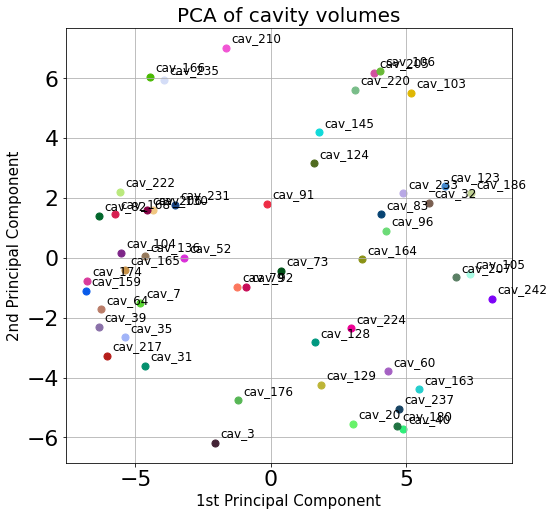

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(volumes_transposed_transposed_selected_norm)
principalDf = pd.DataFrame(data = principalComponents)

principalDf['legend'] = volumes_transposed_transposed_selected_norm.index

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1st Principal Component', fontsize = 15)
ax.set_ylabel('2nd Principal Component', fontsize = 15)
ax.set_title('PCA of cavity volumes', fontsize = 20)
targets = volumes_transposed_transposed_selected_norm.index


from random import randint
colors = []
for i in range(len(targets)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


for target, color in zip(targets,colors):
    indicesToKeep = principalDf['legend'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 0],
               principalDf.loc[indicesToKeep, 1], 
               c = color,
               s = 50)

#ax.legend(targets,loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

for i, language in enumerate (principalDf['legend']):
    plt.text(principalDf[0][i]+0.2, principalDf[1][i]+0.2, language, fontsize=12)

print(pca.explained_variance_ratio_)


/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



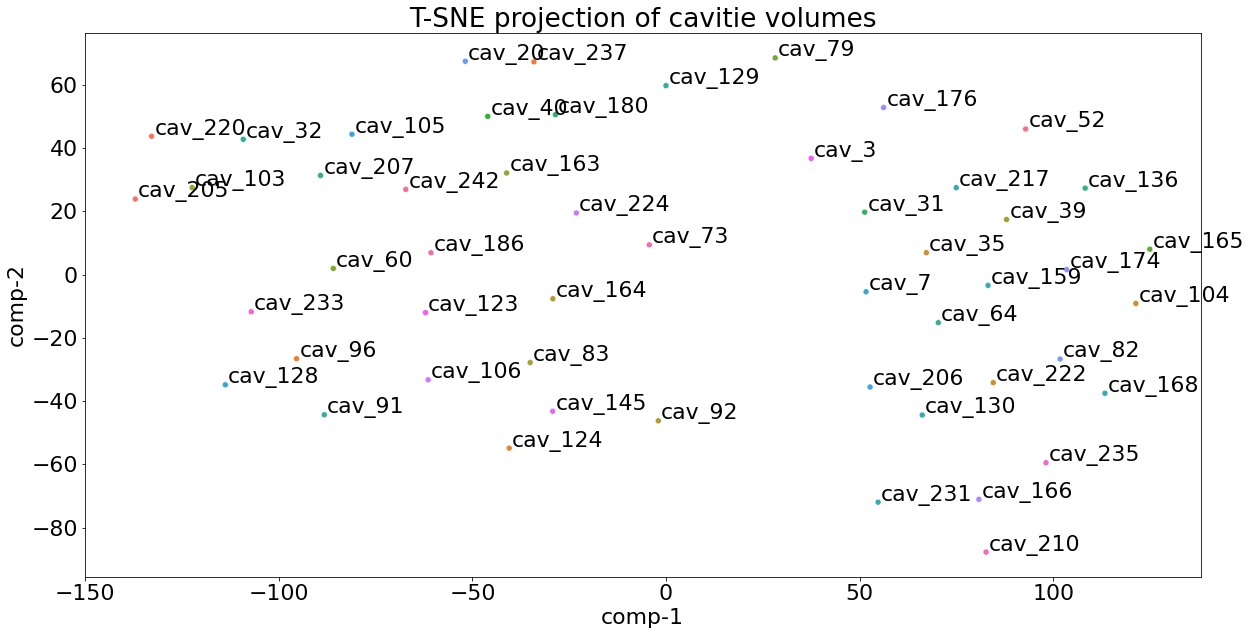

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=15)
z = tsne.fit_transform(volumes_transposed_transposed_selected_norm)
df = pd.DataFrame()
df["y"] = principalDf['legend']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                c = color,
                data=df, legend = False).set(title="T-SNE projection of cavitie volumes") 
#plt.legend(bbox_to_anchor=(1.05, 1), loc=10, borderaxespad=0.)

for i, language in enumerate(df["y"]):
    plt.annotate(language, (df["comp-1"][i]+0.7, df["comp-2"][i]+0.5) )

In [22]:
methods1 = ['single', 'complete', 'average', 'weighted'] 
methods2 = ['centroid', 'median', 'ward']

distances = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 
             'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 
             'kulsinski', 'matching', 'minkowski', 'rogerstanimoto',
             'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',]

distances2 = ['euclidean']

#'weighted cosine': 0.7610297973540397
# 'weighted sqeuclidean': 0.7610297973540399}
#'centroid euclidean': 0.7756486013338777
#'average euclidean': 0.803292177643437

c_values = {}
for m in methods1:
    for d in distances:
        try:
            # Hierarchical clustering
            Z = linkage(volumes_transposed_transposed_selected_norm, method=m, metric= d)
            c, coph_dists = cophenet(Z, pdist(volumes_transposed_transposed_selected_norm))
            c_values[m+" "+d] = c
        except:
            print('does not work', m, d)

print({k: v for k, v in sorted(c_values.items(), key=lambda item: item[1])})

does not work single jensenshannon
does not work complete jensenshannon
does not work average jensenshannon
does not work weighted jensenshannon
{'single chebyshev': 0.27258064327994064, 'single correlation': 0.41617821961671003, 'single cosine': 0.4161782196167101, 'single canberra': 0.45230413529657904, 'single euclidean': 0.46956983104619715, 'single minkowski': 0.46956983104619715, 'single seuclidean': 0.5283198132620788, 'single cityblock': 0.6141929667717279, 'single braycurtis': 0.6645877971145651, 'single dice': nan, 'single hamming': nan, 'single jaccard': nan, 'single kulsinski': nan, 'single matching': nan, 'single rogerstanimoto': nan, 'single russellrao': nan, 'single sokalmichener': nan, 'single sokalsneath': nan, 'single sqeuclidean': 0.4161782196167103, 'complete chebyshev': 0.6211935182032352, 'average chebyshev': 0.6964167590670524, 'complete braycurtis': 0.6973307358114679, 'complete correlation': 0.7134987347491866, 'complete cosine': 0.7134987347491867, 'complete e

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:1707: RuntimeWarning:

invalid value encountered in double_scalars



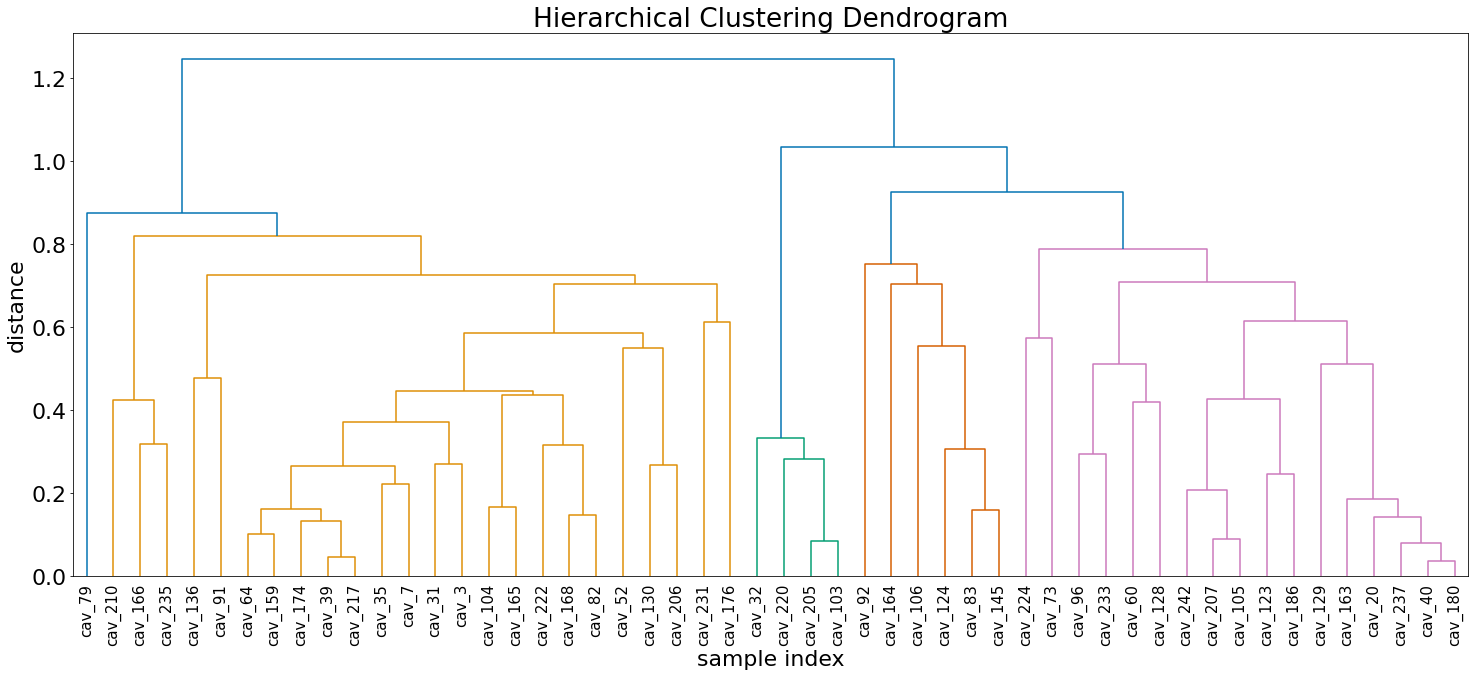

In [23]:
# Hierarchical clustering
Z = linkage(volumes_transposed_transposed_selected_norm, method='average', metric='cosine')
#c, coph_dists = cophenet(Z, pdist(volumes_100_norm))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels = volumes_transposed_transposed_selected_norm.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [24]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical clustering dendrogram of cavity volumes')
        plt.xlabel('Cavity number')
        plt.ylabel('Euclidean distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            print(i[1:3])
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        #if max_d:
        #    plt.axhline(y=max_d, c='k')
    return ddata

[25.0, 35.0]
[15.0, 30.0]
[45.0, 55.0]
[65.0, 75.0]
[95.0, 105.0]
[85.0, 100.0]
[70.0, 92.5]
[115.0, 125.0]
[81.25, 120.0]
[135.0, 145.0]
[100.625, 140.0]
[155.0, 165.0]
[185.0, 195.0]
[175.0, 190.0]
[160.0, 182.5]
[120.3125, 171.25]
[215.0, 225.0]
[205.0, 220.0]
[145.78125, 212.5]
[235.0, 245.0]
[179.140625, 240.0]
[50.0, 209.5703125]
[22.5, 129.78515625]
[5.0, 76.142578125]
[275.0, 285.0]
[265.0, 280.0]
[255.0, 272.5]
[335.0, 345.0]
[325.0, 340.0]
[315.0, 332.5]
[305.0, 323.75]
[295.0, 314.375]
[355.0, 365.0]
[375.0, 385.0]
[395.0, 405.0]
[380.0, 400.0]
[425.0, 435.0]
[415.0, 430.0]
[445.0, 455.0]
[422.5, 450.0]
[505.0, 515.0]
[495.0, 510.0]
[485.0, 502.5]
[475.0, 493.75]
[465.0, 484.375]
[436.25, 474.6875]
[390.0, 455.46875]
[360.0, 422.734375]
[304.6875, 391.3671875]
[263.75, 348.02734375]
[40.5712890625, 305.888671875]


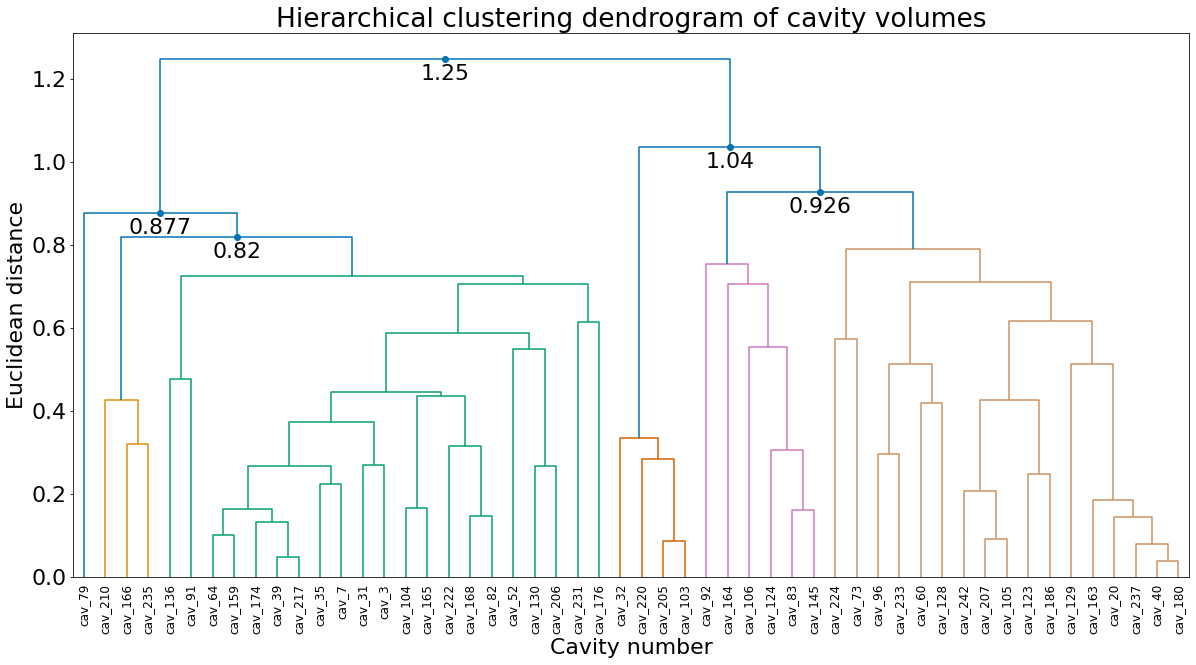

In [25]:
fancy_dendrogram(
    Z,
    #truncate_mode='lastp', # show inly the last merges clusters
    p=20, # show only the last p merged clusters
    labels = volumes_transposed_transposed_selected_norm.index,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,
    annotate_above=0.8,  # useful in small plots so annotations don't overlap
    max_d=0.8, # Selecting a Distance Cut-Off aka Determining the Number of Clusters
)

plt.savefig('volume_clust.png',bbox_inches='tight')
plt.show()


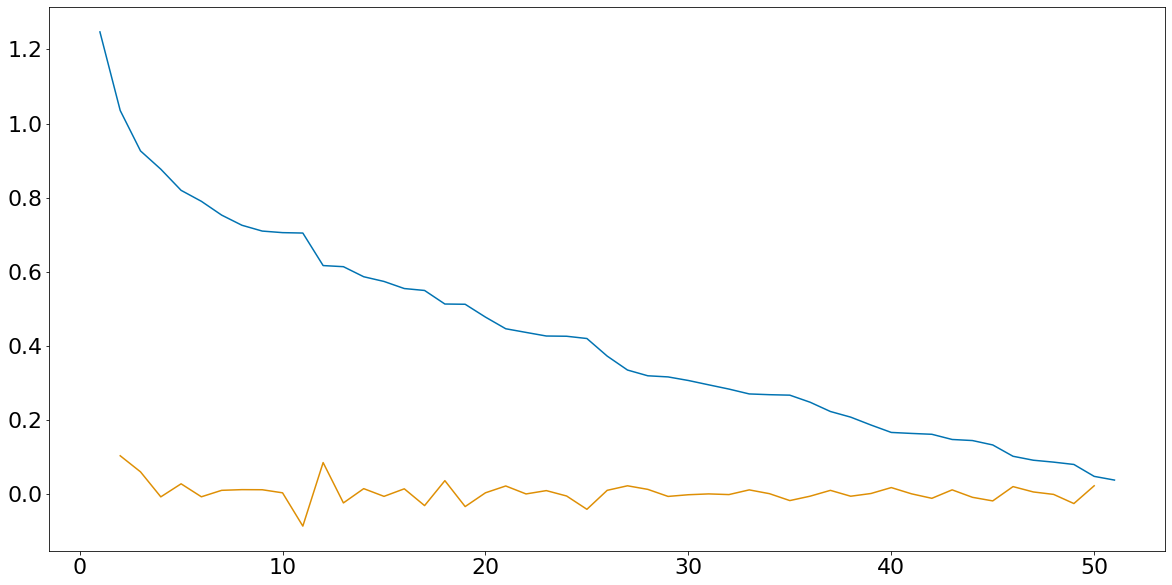

clusters: 2


In [26]:
# find the clustering step where the acceleration of distance growth is the biggest 
# (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below)

#last = Z[-10:, 2]
last = Z[:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print( "clusters:", k)

In [27]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')

clusters_l = list(clusters)
d = {x:(clusters_l).count(x) for x in clusters_l}
d

{2: 21, 4: 4, 6: 17, 5: 6, 3: 1, 1: 3}

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



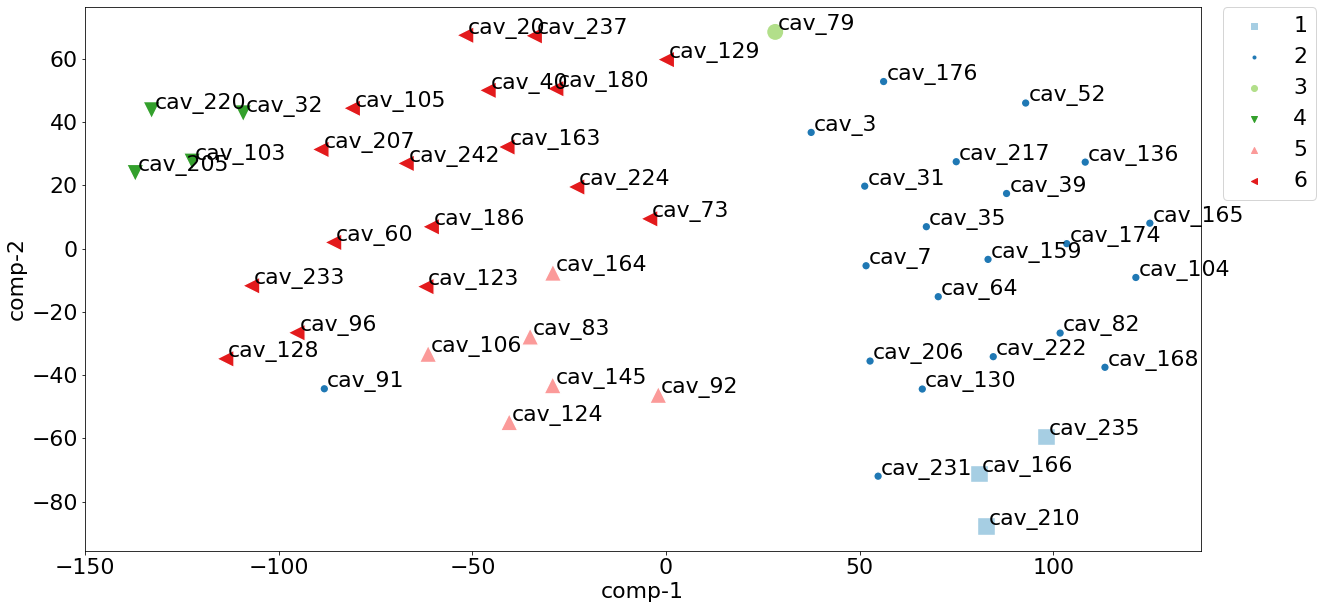

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



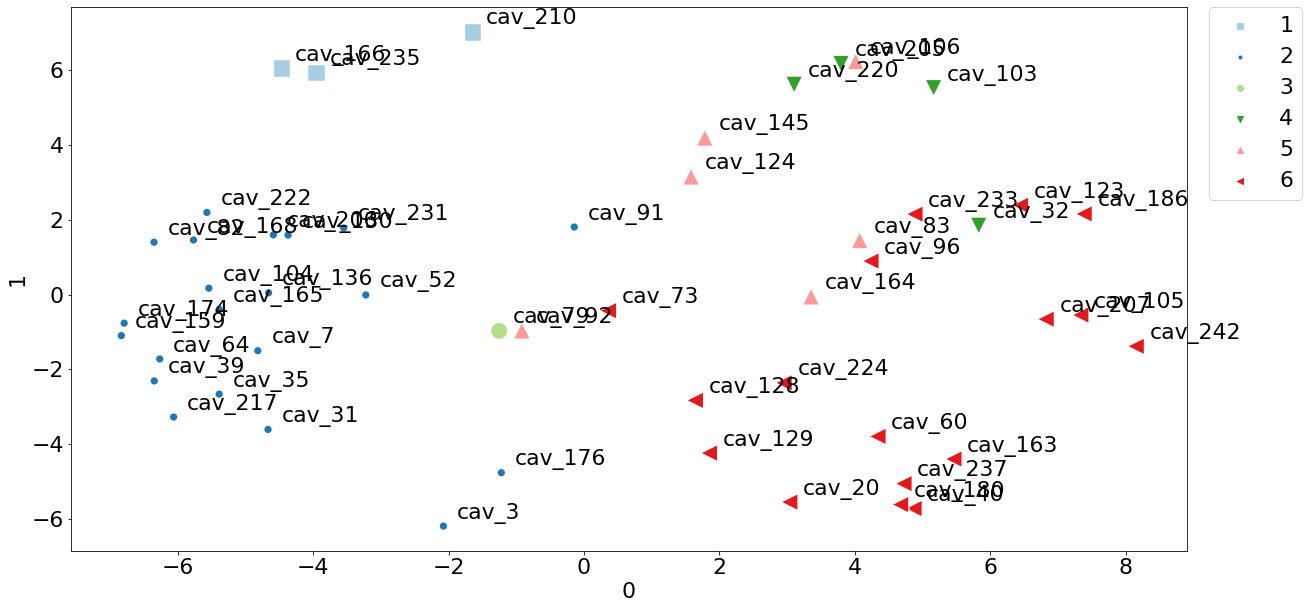

In [36]:
colors = {'1':'#d73027', '2':'#fc8d59', '3':'#fee090', 
          '4':'#ffffbf', '5':'#e0f3f8', '6':'#91bfdb', '7':'#4575b4', '8':'#459ab4',
         '9':'#8dd3c7','10':'#ffffb3','11':'#bebada','12':'#fb8072','13':'#80b1d3','14':'#fdb462',
         '15':'#b3de69','16':'#fccde5','17':'#d9d9d9','18':'#bc80bd',
         '19':'#ccebc5','20':'#ffed6f','21':'#a6cee3'}


ax = sns.scatterplot(df.iloc[:,1], df.iloc[:,2], s=300, hue=clusters, 
                     palette="Paired", style= clusters,
                     markers=[',', '.', 'o', 'v', '^', '<',])
                             # '>',
                              #'8', 's', 'p', '*', 'h', 'H', 'D', 'd',
                              #'P', 'X',',', '.', 'o', 'v'])
                     
for i, language in enumerate(df["y"]):
    plt.annotate(language, (df["comp-1"][i]+0.7, df["comp-2"][i]+0.5) )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig = ax.get_figure()
fig.savefig('PCA_COLORcluster_%d.png' % cluster)
plt.show()



ax = sns.scatterplot(principalDf[0], principalDf[1], s=300, hue=clusters, 
                     palette="Paired", style= clusters,
                     markers=[',', '.', 'o', 'v', '^', '<',])
                     #'>', 
                     #         '8', 's', 'p', '*', 'h', 'H', 'D',
                     #         'd', 'P', 'X',',', '.', 'o', 'v'])


for i, language in enumerate (principalDf['legend']):
    plt.text(principalDf[0][i]+0.2, principalDf[1][i]+0.2, language)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = ax.get_figure()
fig.savefig('TSNE_COLORcluster_%d.png' % cluster)
plt.show()

volumes_transposed_transposed_selected_norm['cluster'] = clusters
volumes_transposed_transposed_selected_norm.to_csv('centered_cluster_volumedata.txt', sep=' ')


/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together

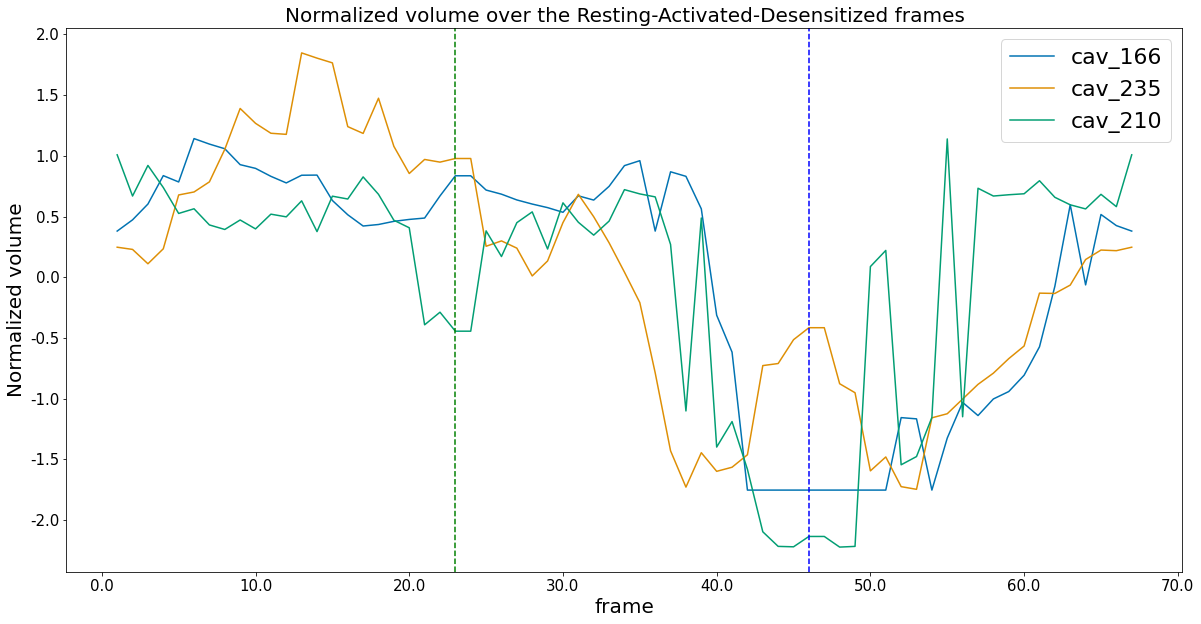

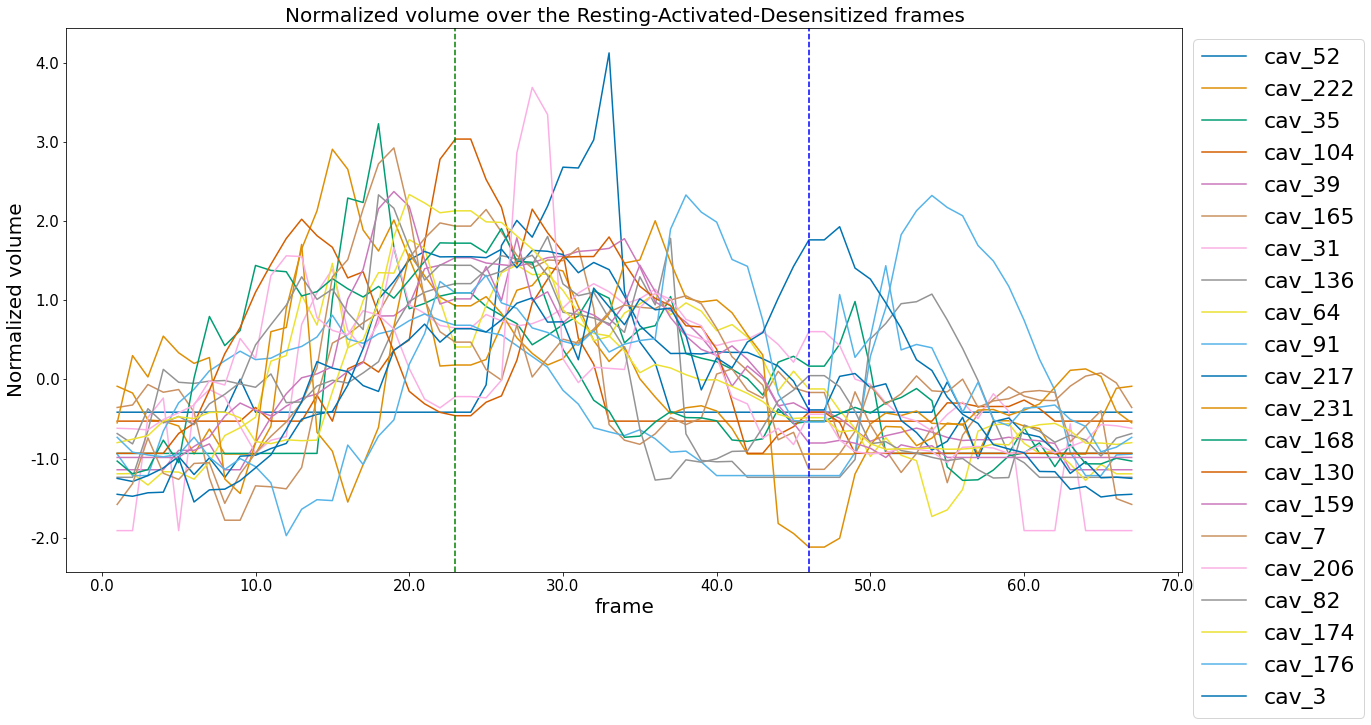

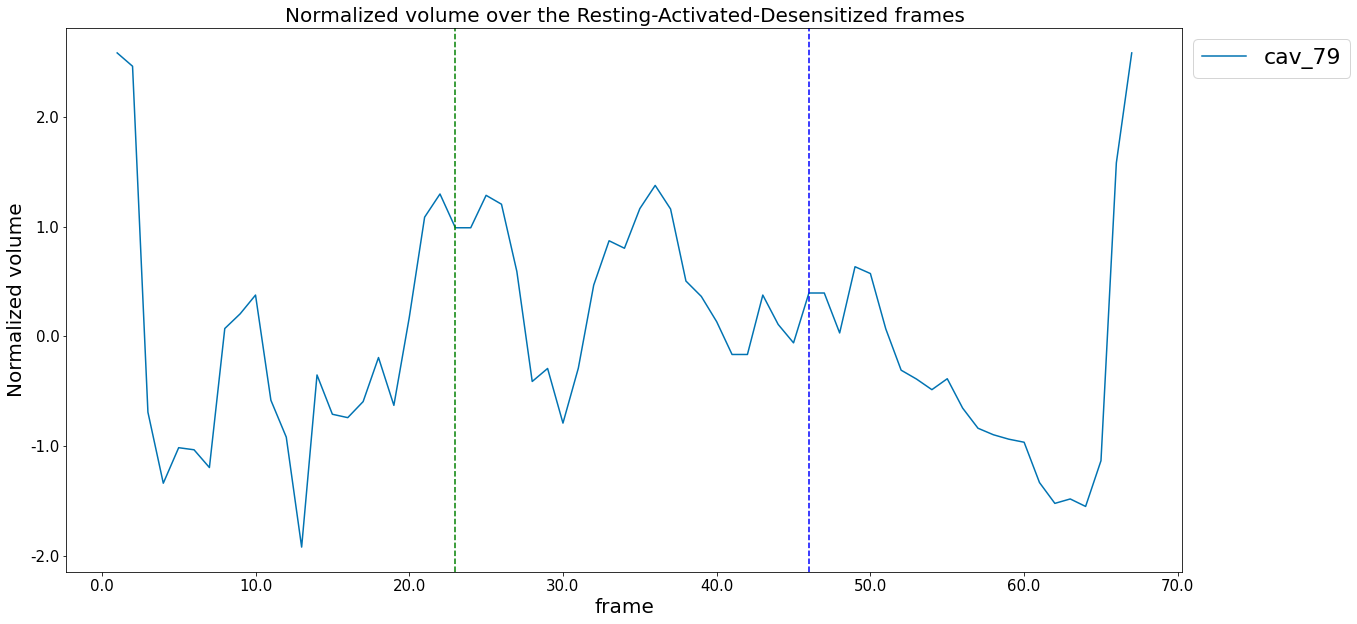

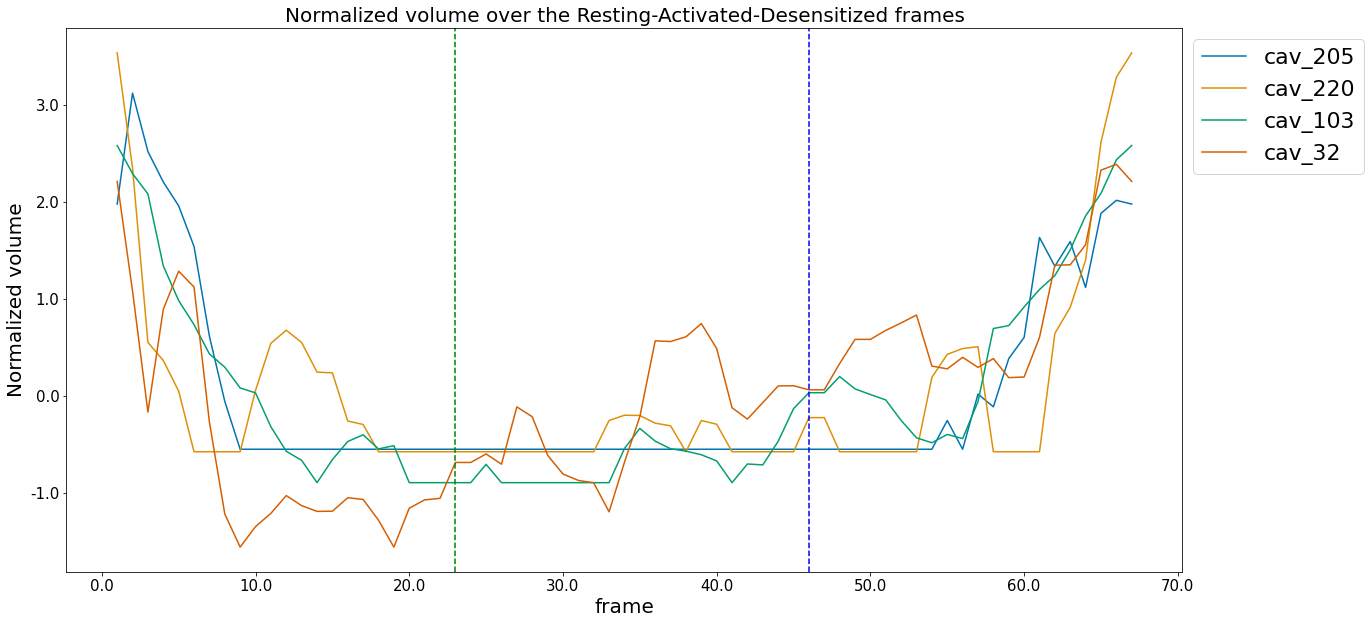

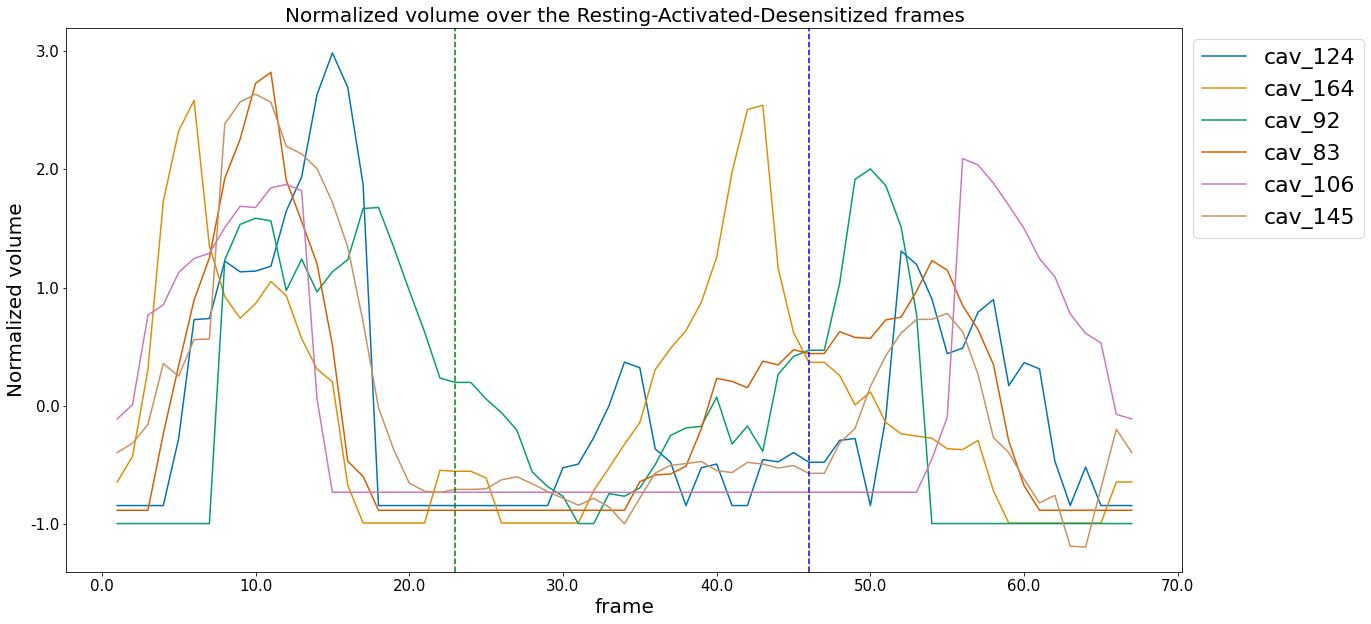

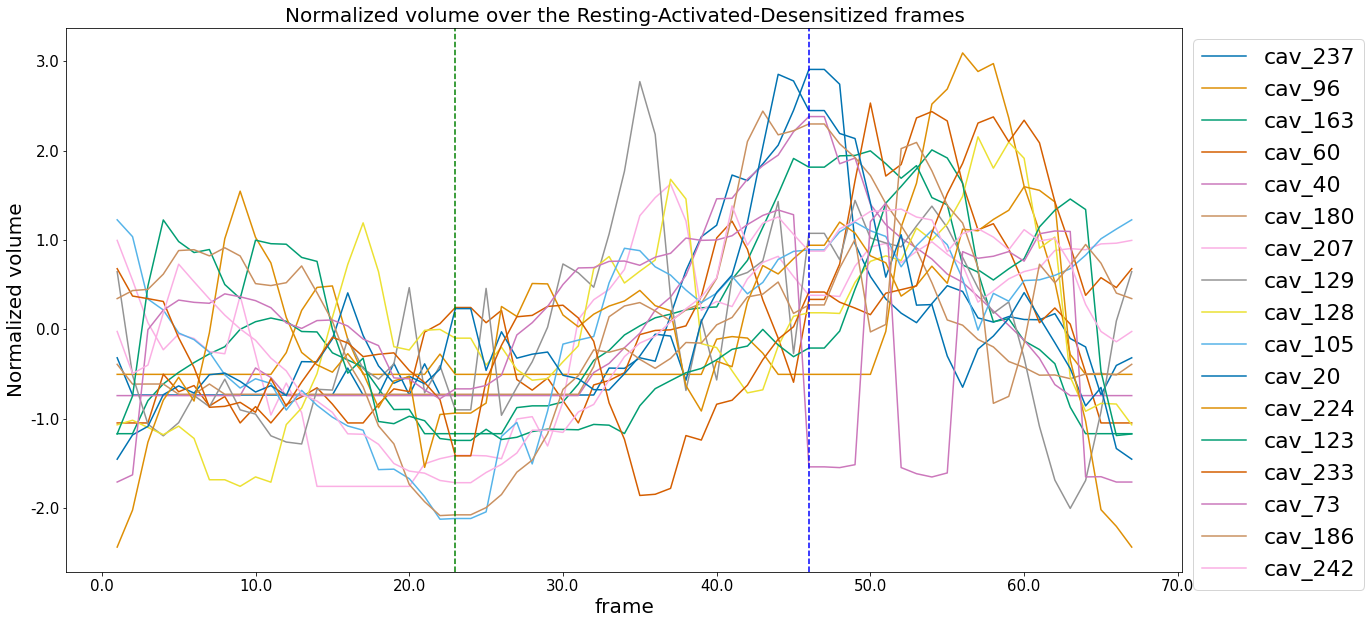

In [33]:
import matplotlib.pyplot as plt

for cluster in set(clusters):
    data = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == cluster]
    data = data.iloc[:,:-1].T
    ax = data.plot(figsize=(20, 10))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.axes.set_title("Normalized volume over the Resting-Activated-Desensitized frames",fontsize=20)
    ax.set_xlabel("frame",fontsize=20)
    ax.set_ylabel("Normalized volume",fontsize=20)
    ax.tick_params(labelsize=9)
    ax.set_yticklabels(ax.get_yticks(), size = 15)
    ax.set_xticklabels(ax.get_xticks(), size = 15)
    plt.axvline(x = 23, color = 'green', linestyle='--')
    plt.axvline(x = 46, color = 'blue', linestyle='--')
 
    fig = ax.get_figure()
    fig.savefig('cluster_%d.png' % cluster)

In [31]:
c1 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 1].mean()
c2 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 2].mean()
c3 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 3].mean()
c4 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 4].mean()
c5 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 5].mean()
c6 = volumes_transposed_transposed_selected_norm[volumes_transposed_transposed_selected_norm['cluster'] == 6].mean()


cluster_df = pd.concat([c1, c2, c3, c4, c5, c6,], axis=1)
cluster_df.T.to_csv('averaged_centered_cluster_volumedata.txt', sep=' ')
cluster_df.T

1         2         3         4         5         6         7  \
0  0.545219  0.456840  0.544800  0.603298  0.662563  0.802694  0.771010   
1 -0.920534 -0.906995 -0.777917 -0.668522 -0.704911 -0.617378 -0.503985   
2  2.579905  2.458598 -0.688914 -1.335220 -1.012067 -1.030959 -1.192535   
3  2.572828  2.206423  1.243049  1.197439  1.065722  0.701823  0.047159   
4 -0.642642 -0.573090 -0.299128  0.145684  0.463097  0.836314  0.700595   
5 -0.479529 -0.589981 -0.451171 -0.298127 -0.262243 -0.308896 -0.344571   

          8         9        10  ...        59        60        61        62  \
0  0.835056  0.929653  0.854197  ... -0.311008 -0.228796  0.030190  0.150016   
1 -0.638129 -0.529431 -0.422252  ... -0.584755 -0.634525 -0.697848 -0.762205   
2  0.072236  0.205972  0.376746  ... -0.934510 -0.962351 -1.329254 -1.518671   
3 -0.391427 -0.654027 -0.455531  ...  0.177010  0.281423  0.685666  1.138671   
4  1.531636  1.652475  1.770376  ... -0.133492 -0.234244 -0.353162 -0.497866   
5 -0.297049 -0.295187 -0.324484  ...  0.690200  0.657689  0.528168  0.407885   

         63        64        65        66        67  cluster  
0  0.376261  0.215109  0.474487  0.408414  0.545219      1.0  
1 -0.786139 -0.871631 -0.865899 -0.903281 -0.920534      2.0  
2 -1.478402 -1.546512 -1.130391  1.579124  2.579905      3.0  
3  1.337250  1.479546  2.224781  2.526899  2.572828      4.0  
4 -0.684252 -0.658663 -0.643389 -0.603290 -0.642642      5.0  
5  0.041691 -0.298478 -0.468954 -0.514204 -0.479529      6.0  

[6 rows x 68 columns]

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together

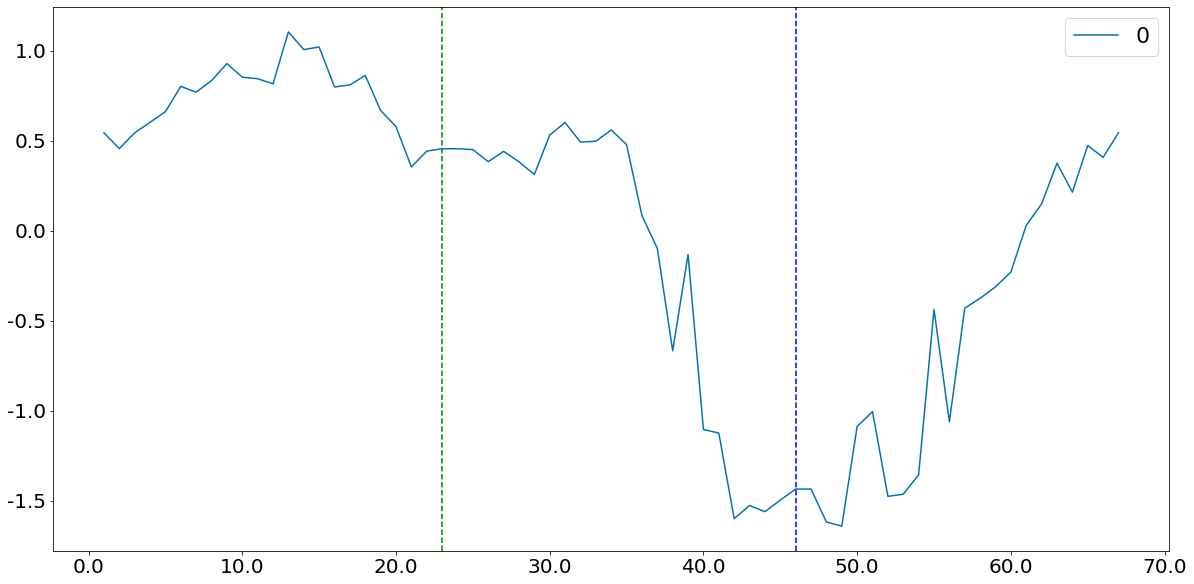

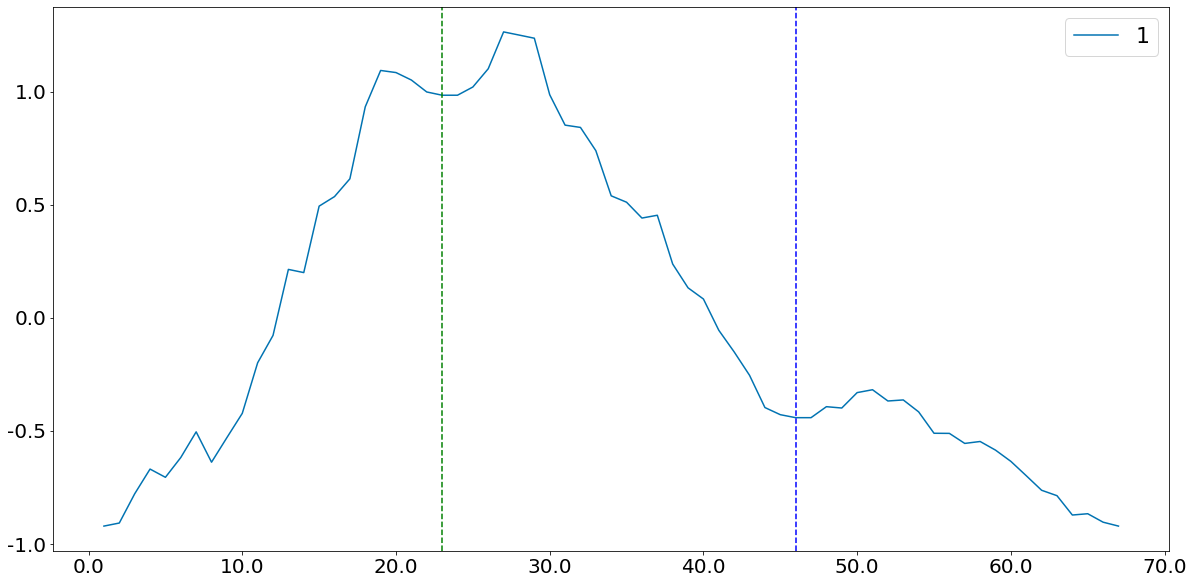

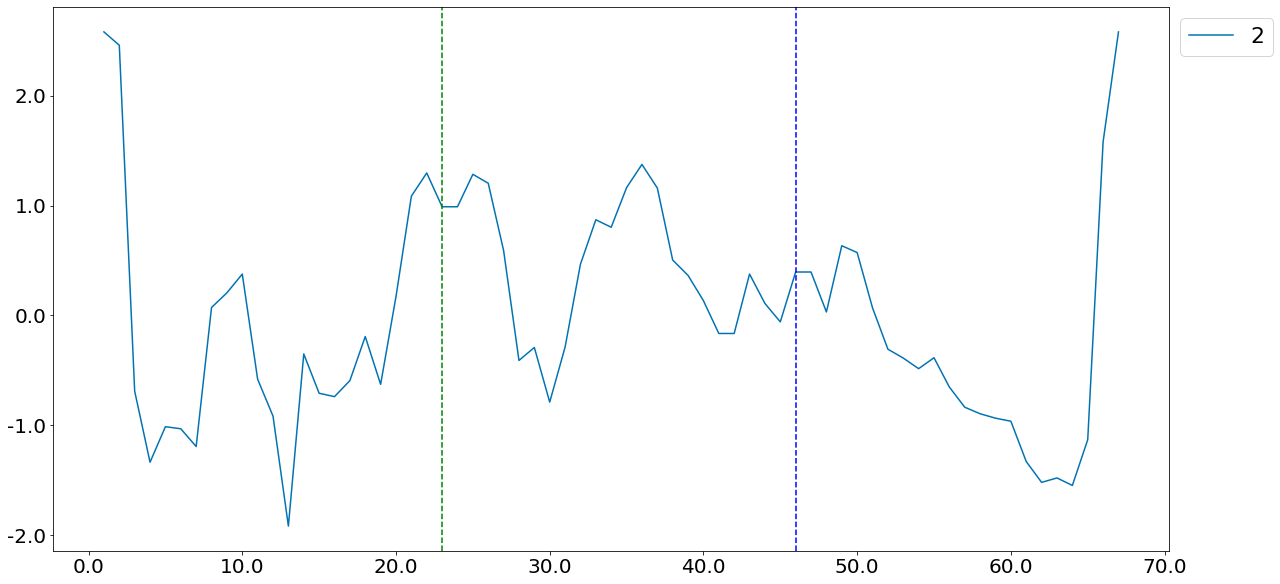

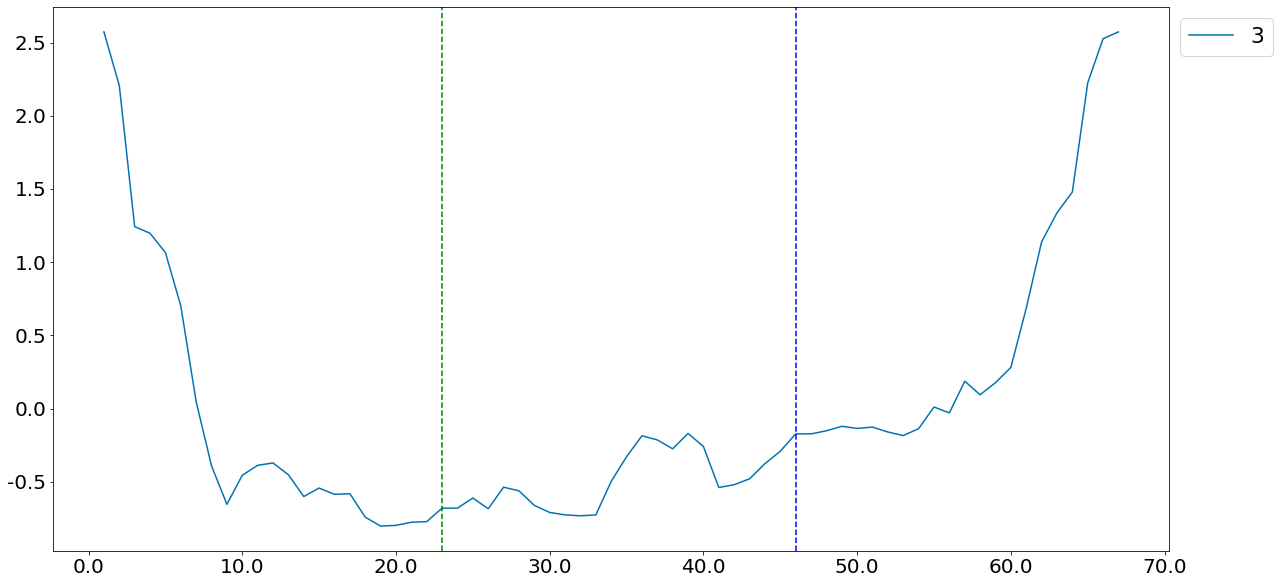

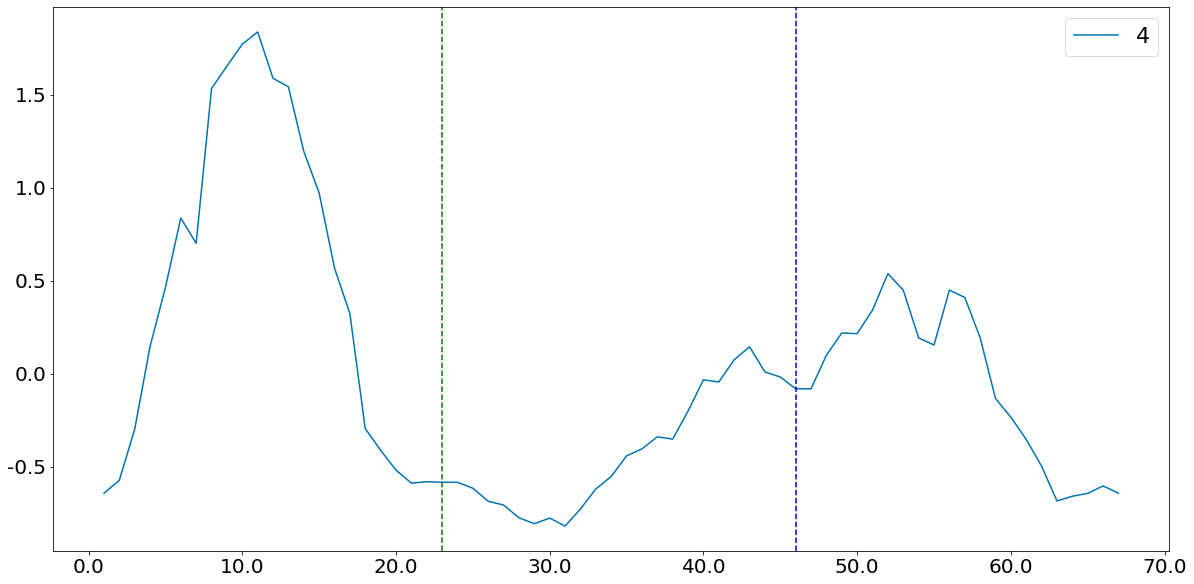

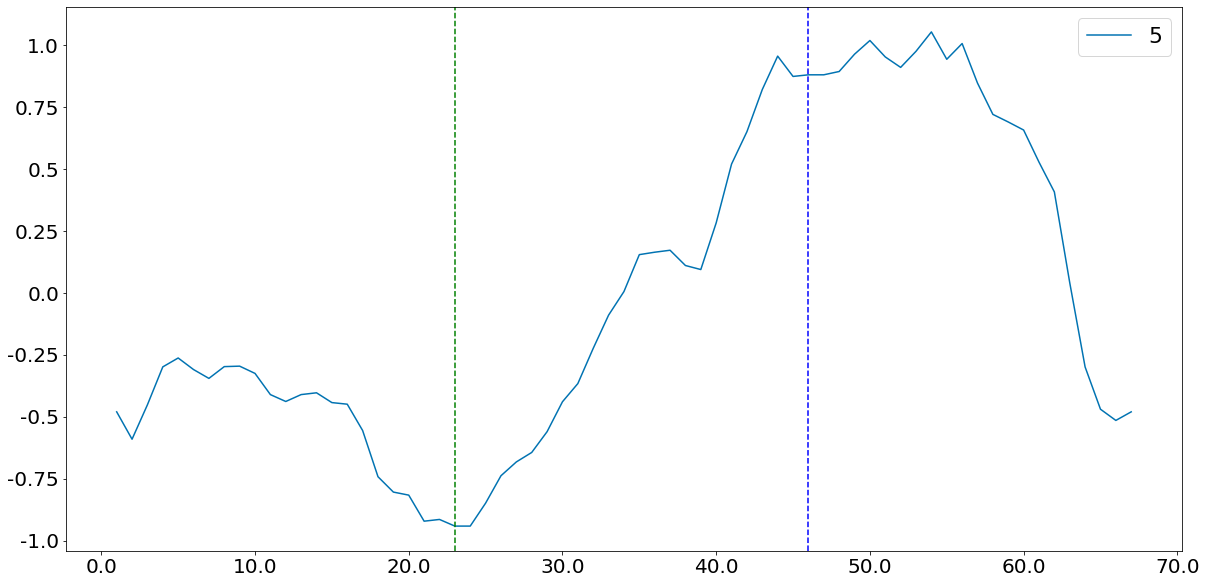

In [34]:
for cluster in set(clusters):
    data = cluster_df.T[cluster_df.T['cluster'] == cluster]
    data = data.iloc[:,:-1].T
    ax = data.plot(figsize=(20, 10))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.axvline(23, color = 'g', linestyle='--')
    plt.axvline(46, color = 'b', linestyle='--')
    
    #ax.axes.set_title("Volume over the Resting-Activated-Desensitized frames",fontsize=40)
    #ax.set_xlabel("frame",fontsize=30)
    #ax.set_ylabel("Averaged normalized volume",fontsize=30)
    ax.tick_params(labelsize=9)
    ax.set_yticklabels(ax.get_yticks(), size = 20)
    ax.set_xticklabels(ax.get_xticks(), size = 20)
    
    fig = ax.get_figure()
    fig.savefig('mean_cluster_%d.png' % cluster)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/c7/home/margonza/miniconda3/envs/NNWS/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



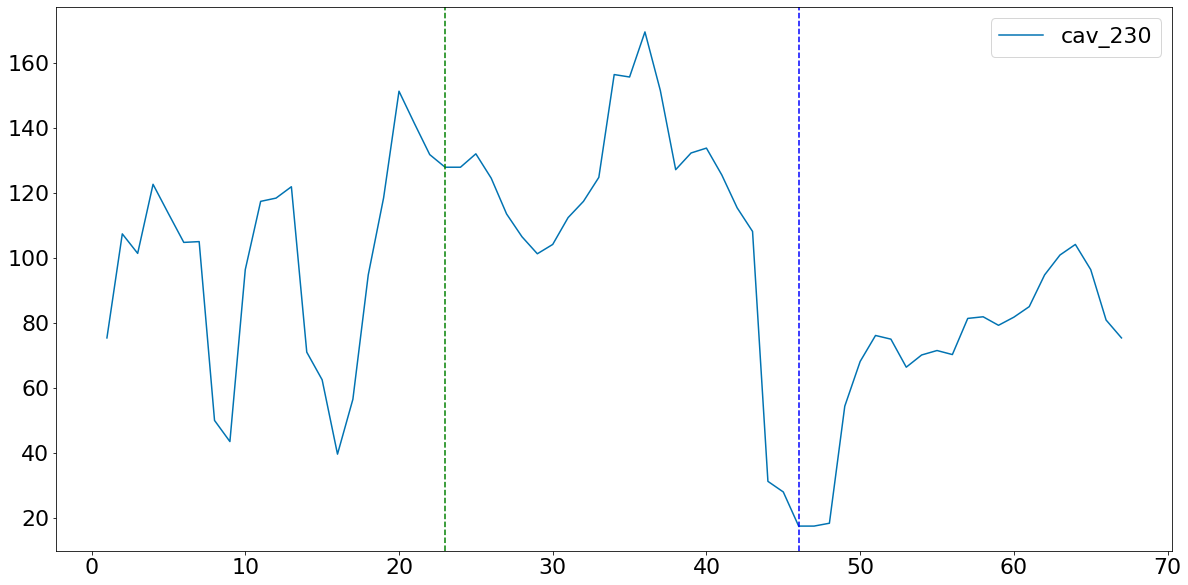

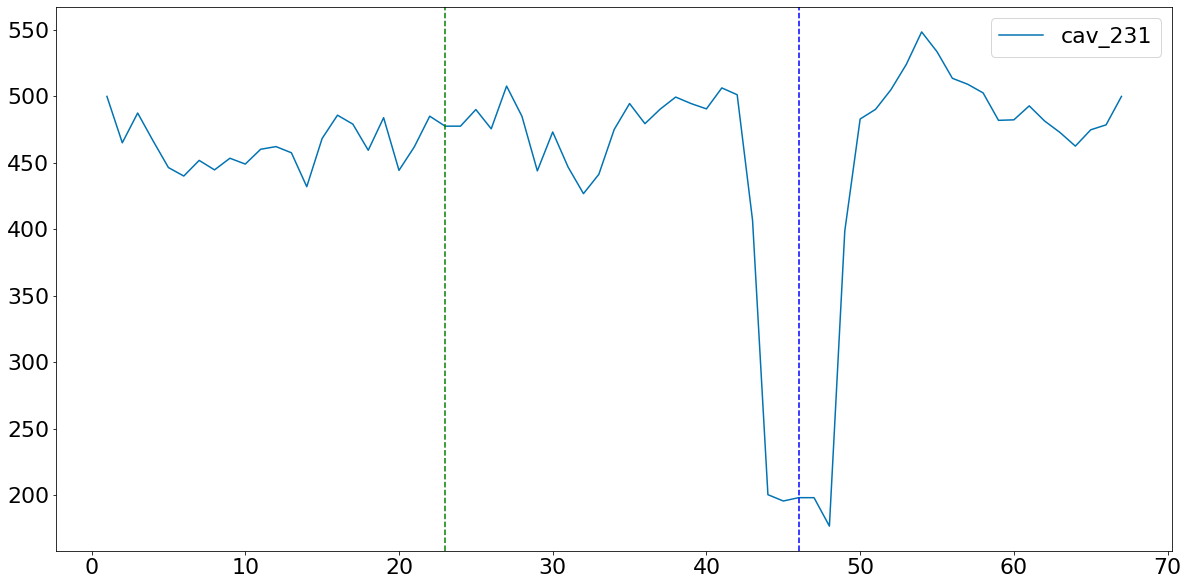

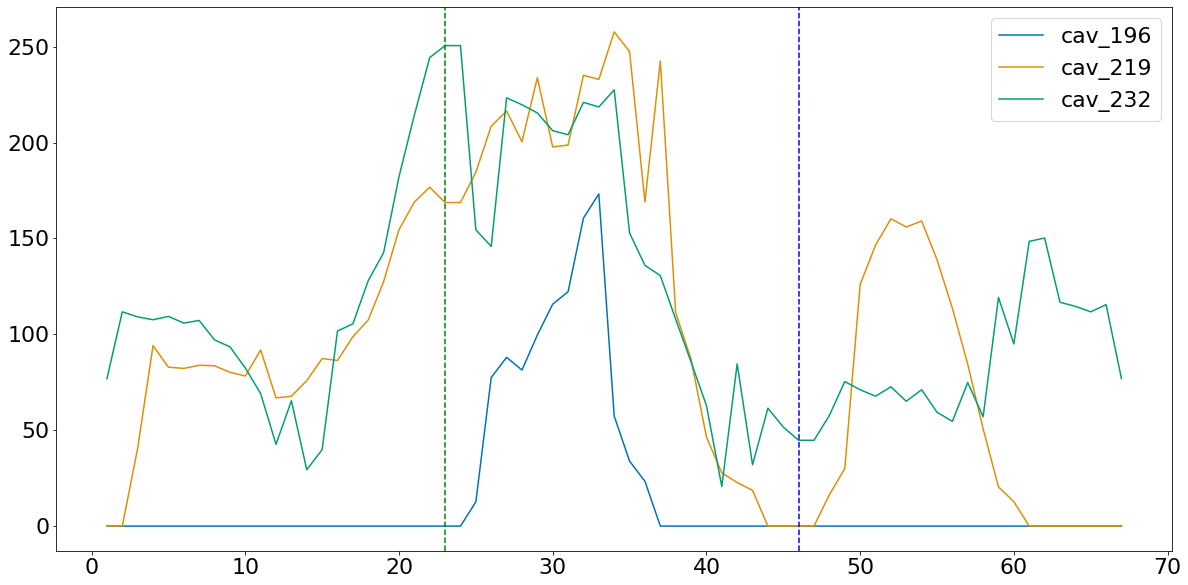

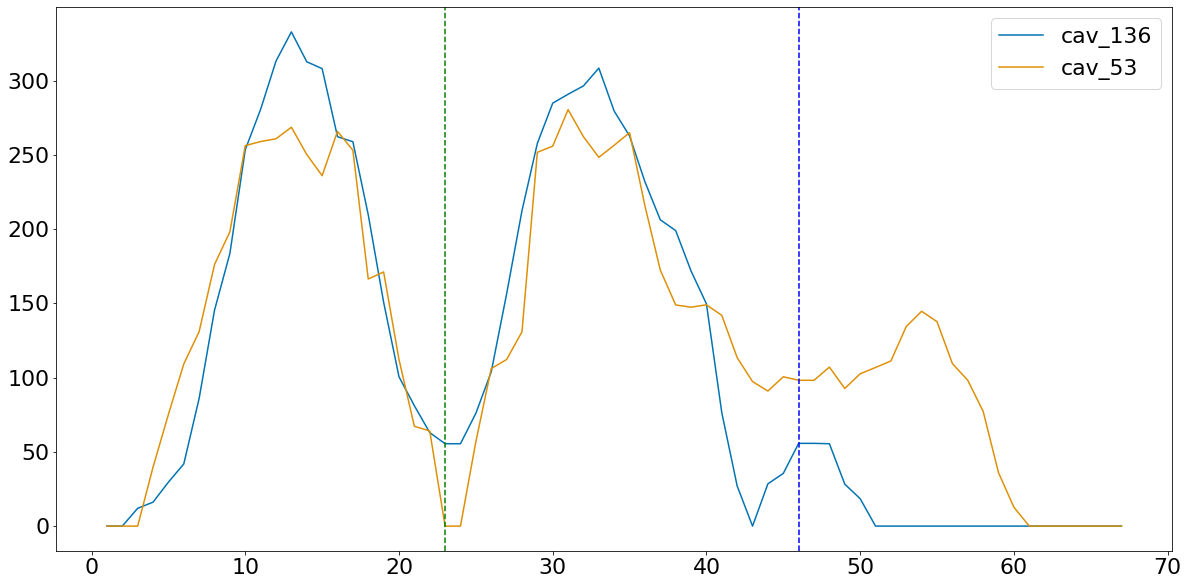

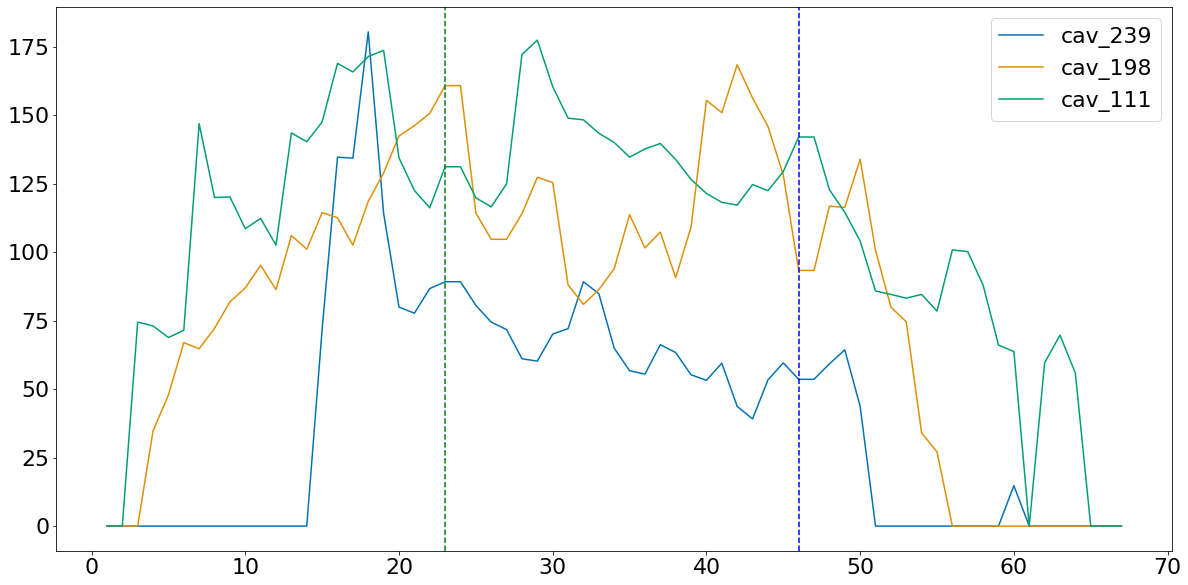

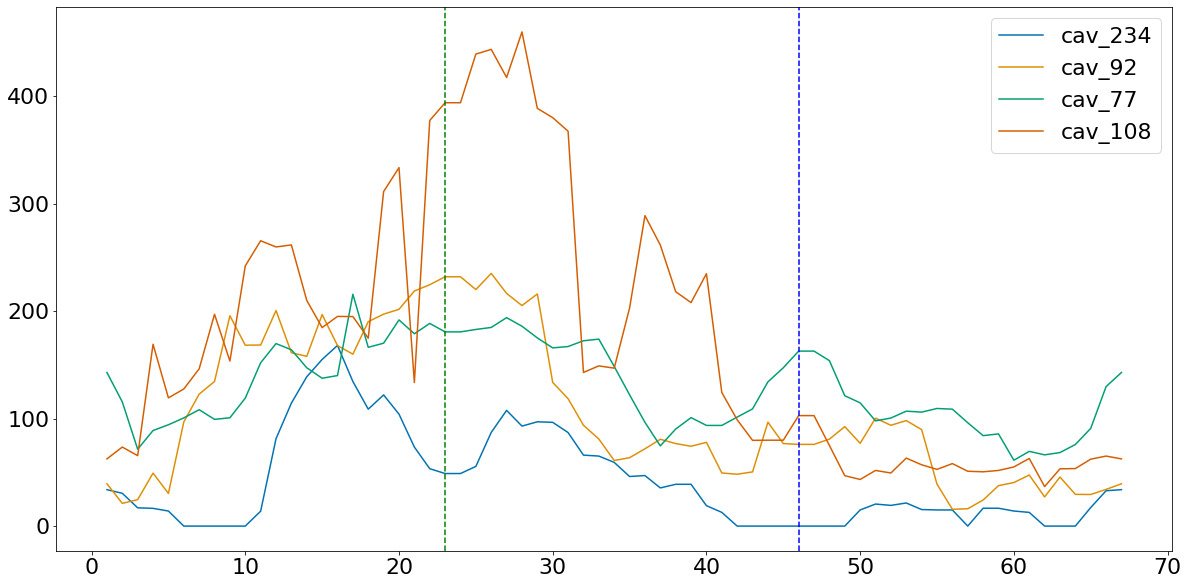

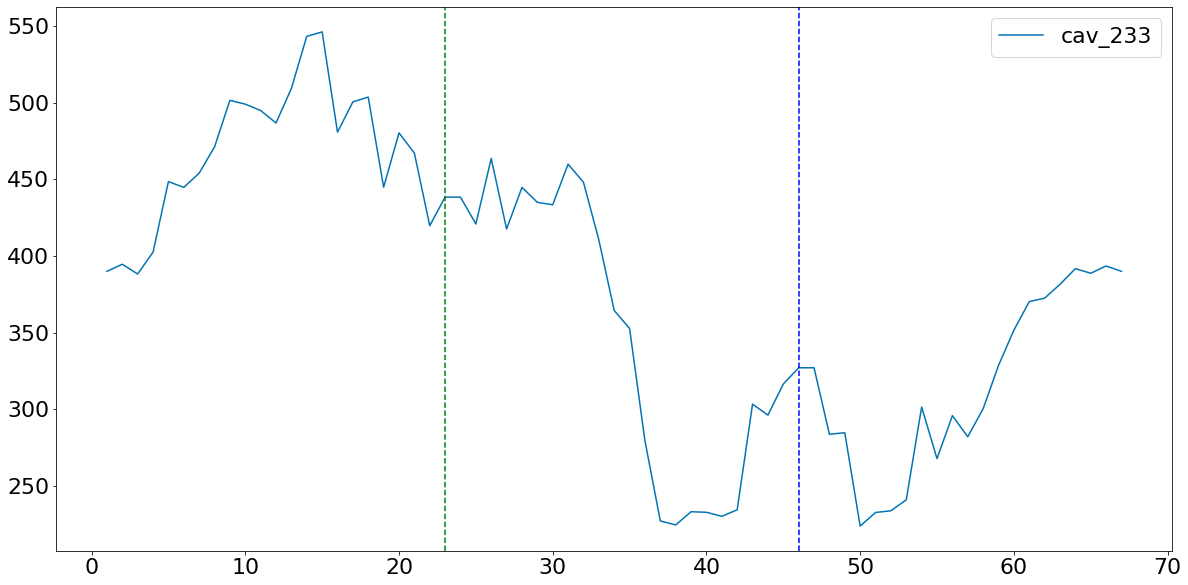

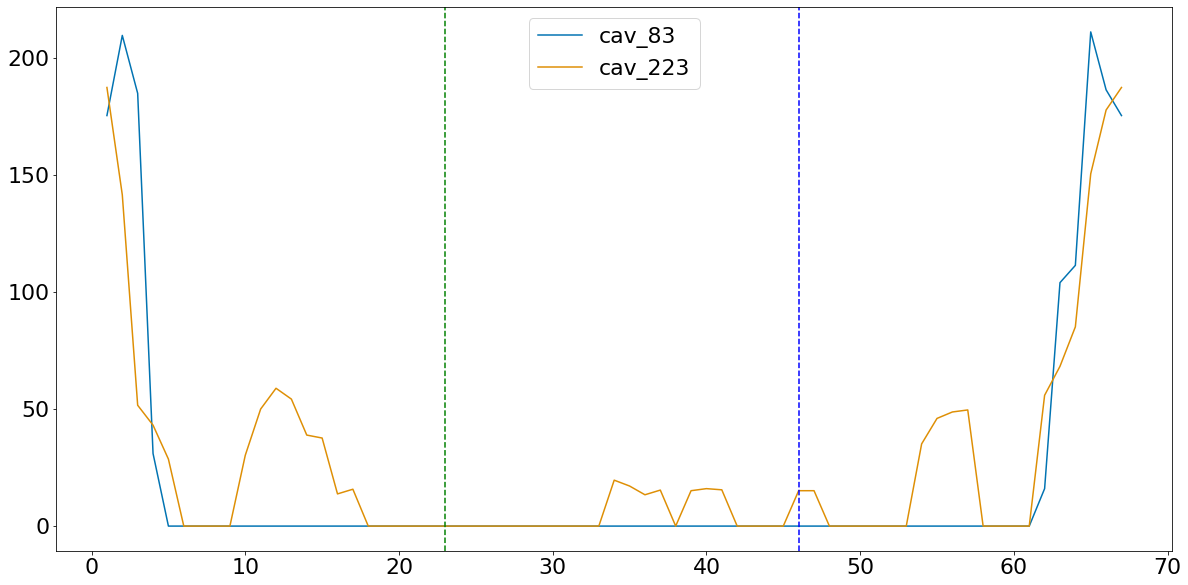

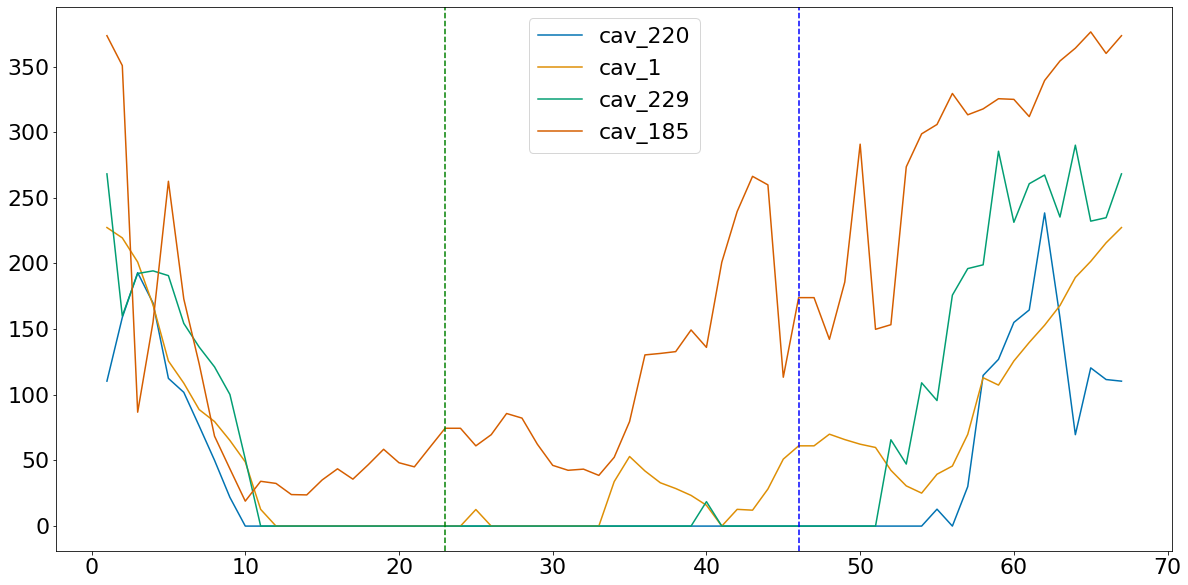

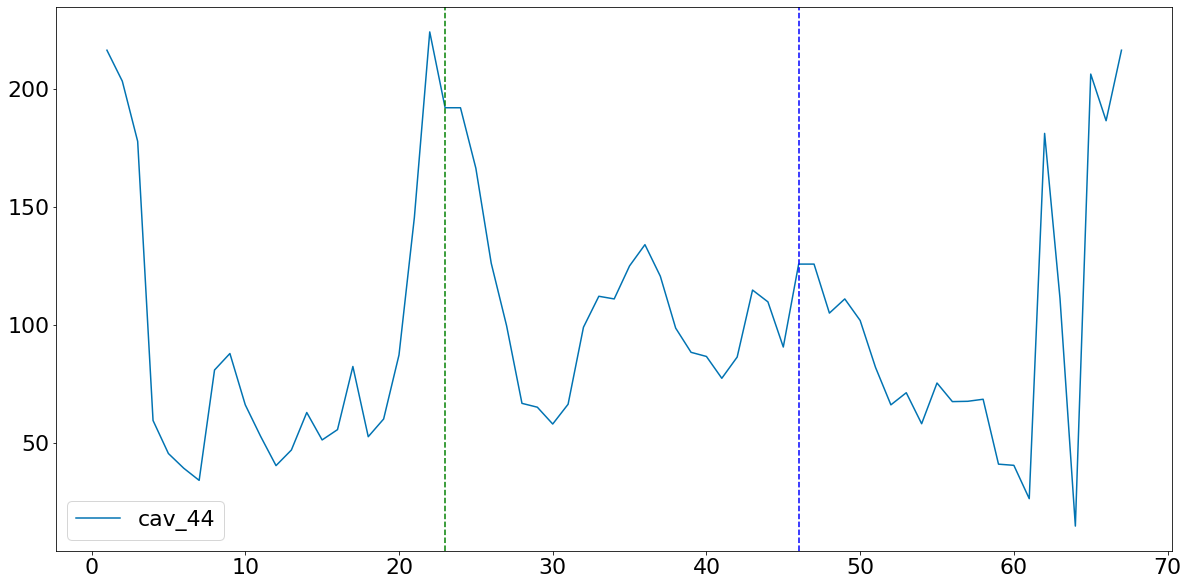

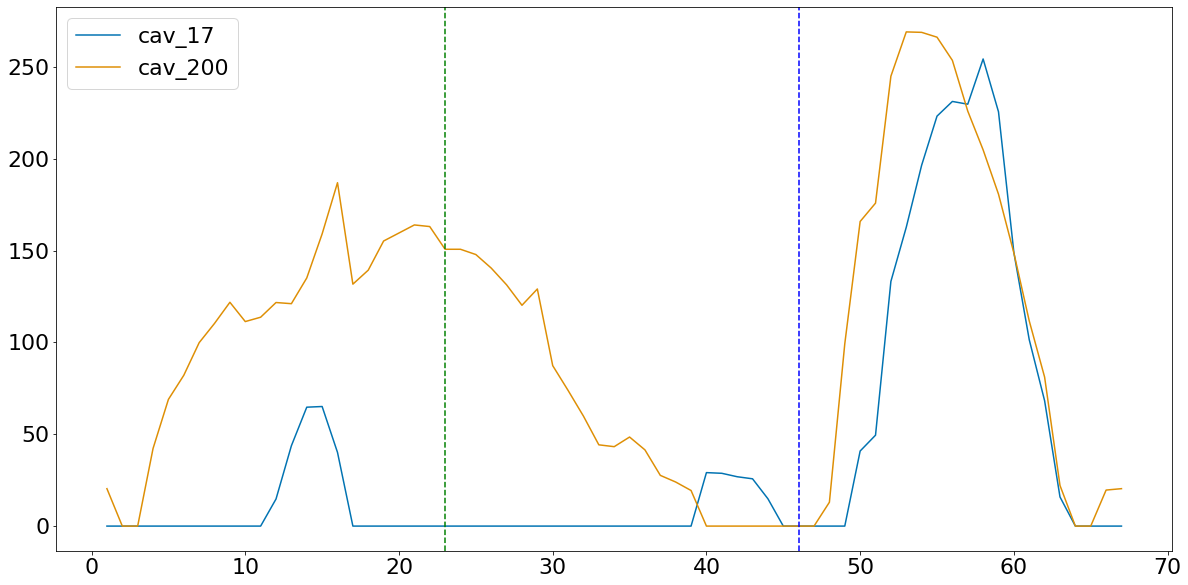

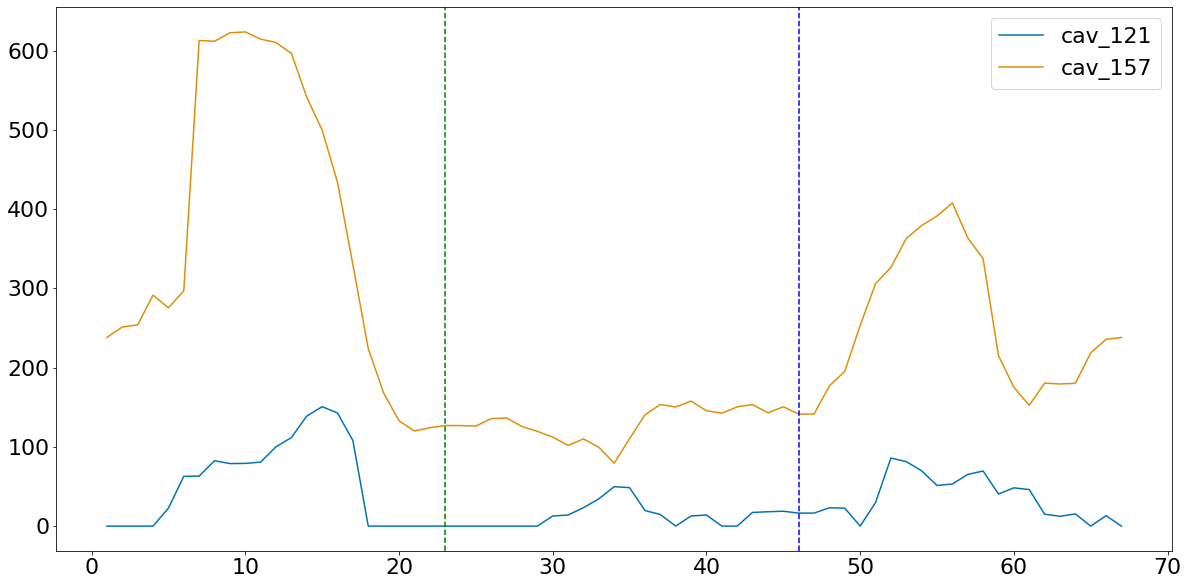

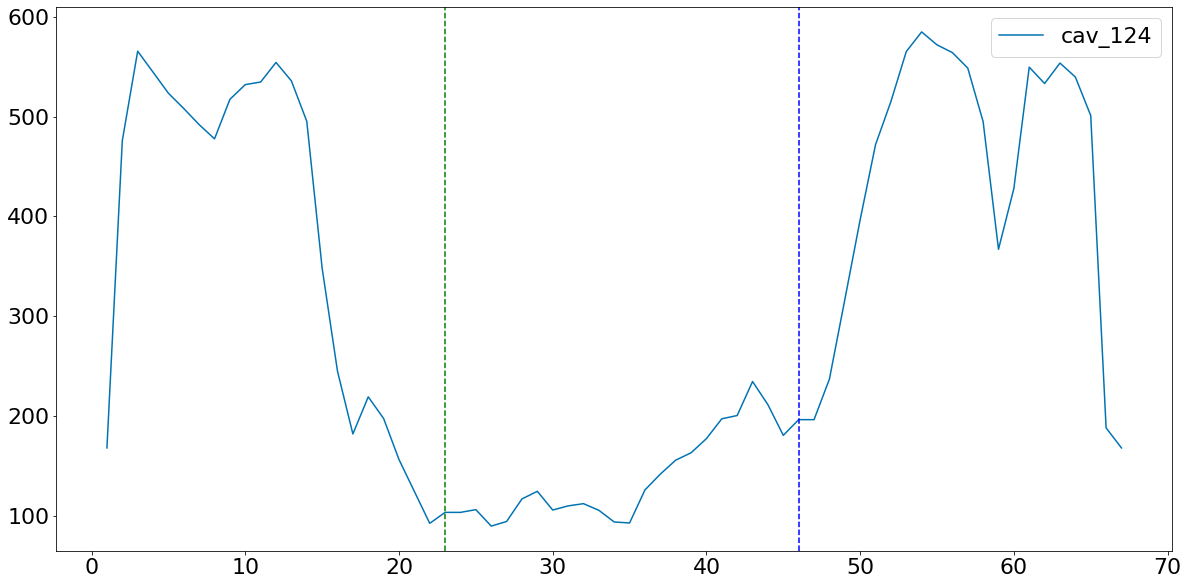

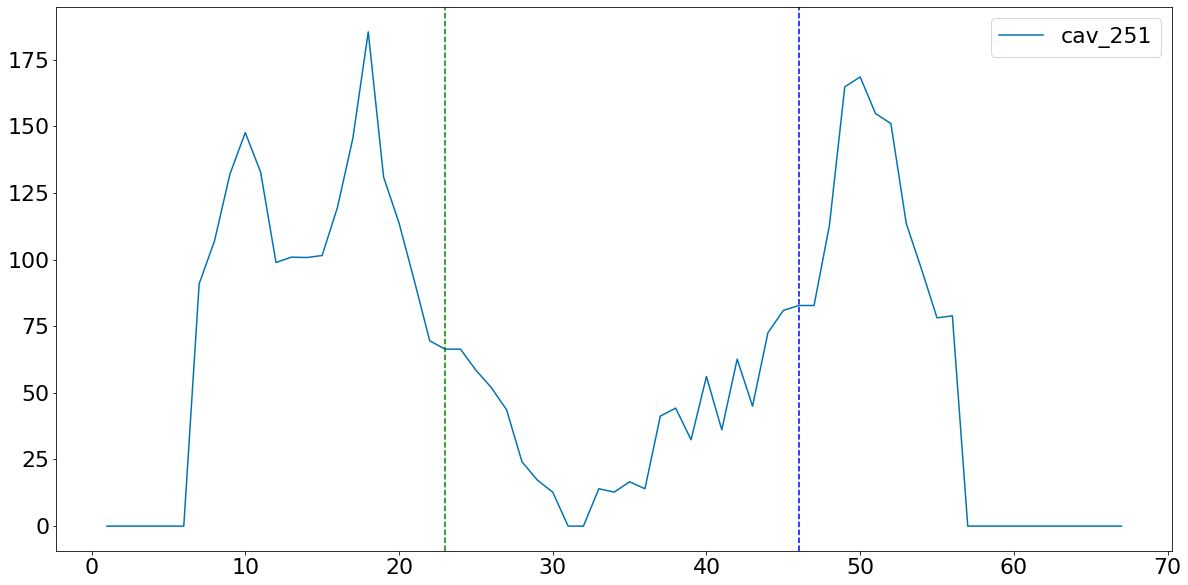

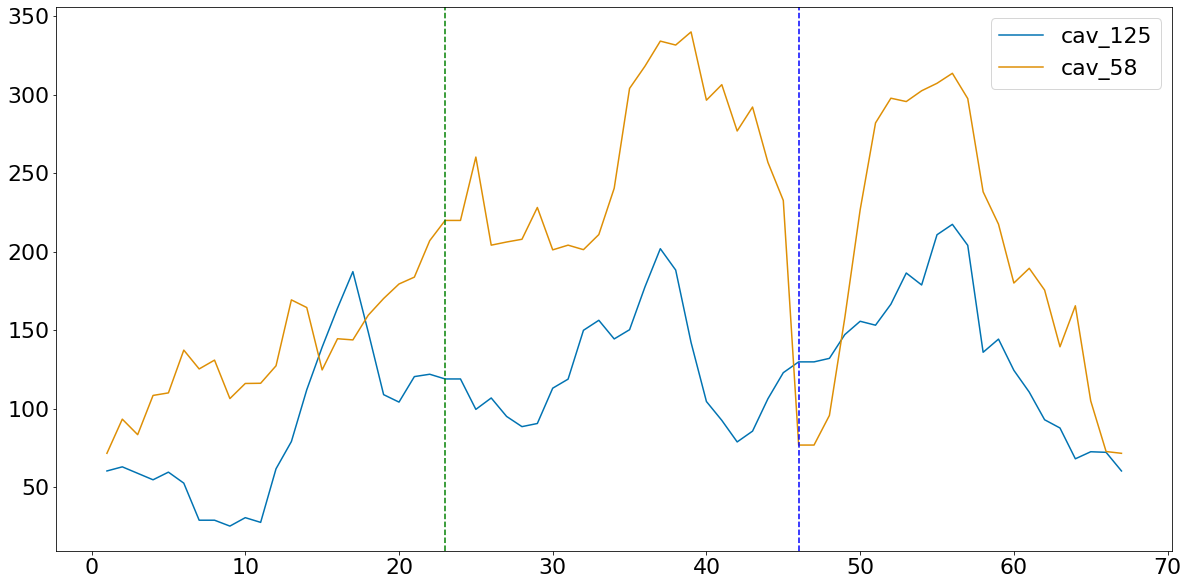

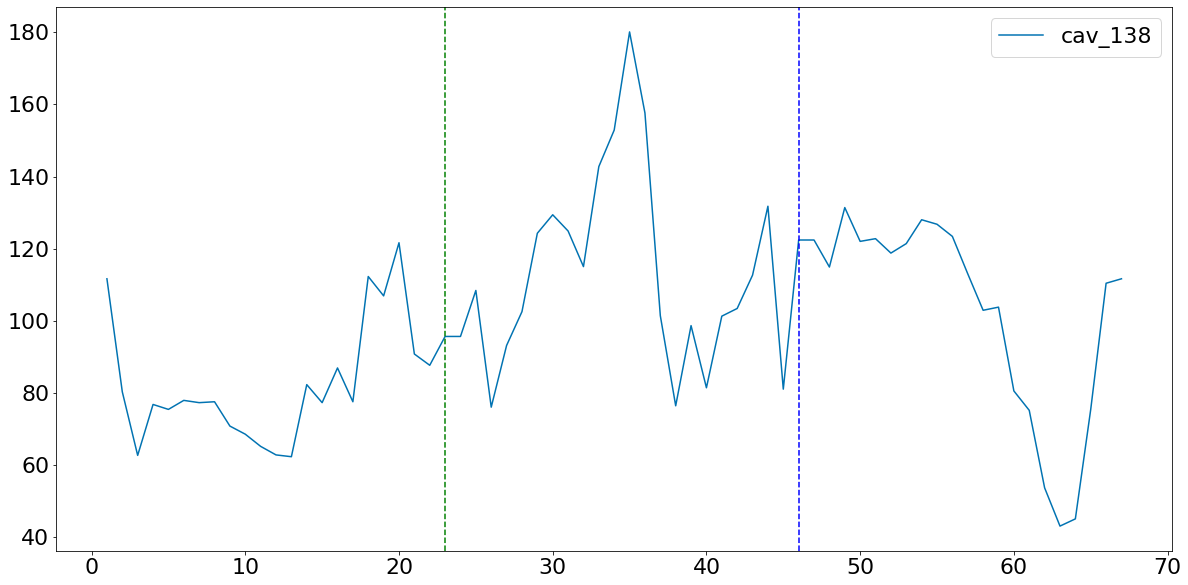

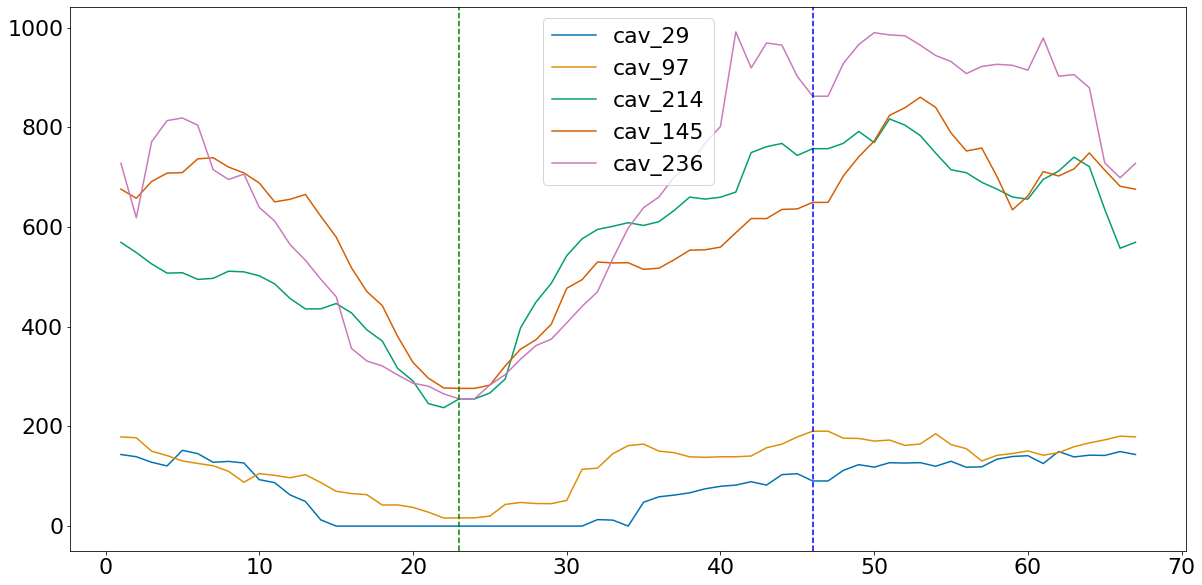

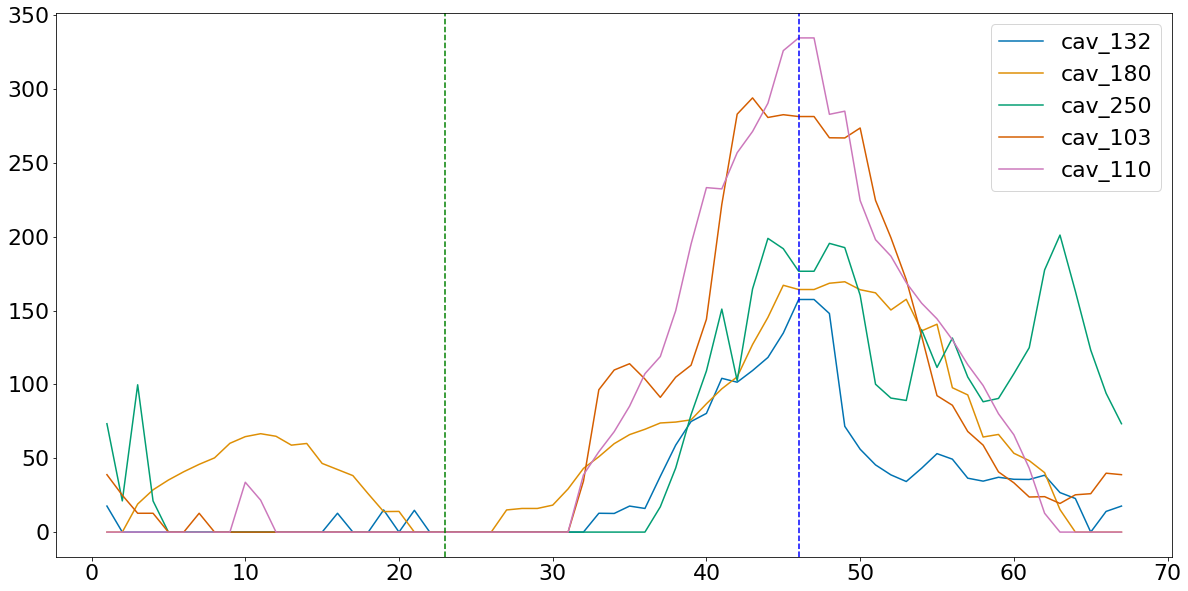

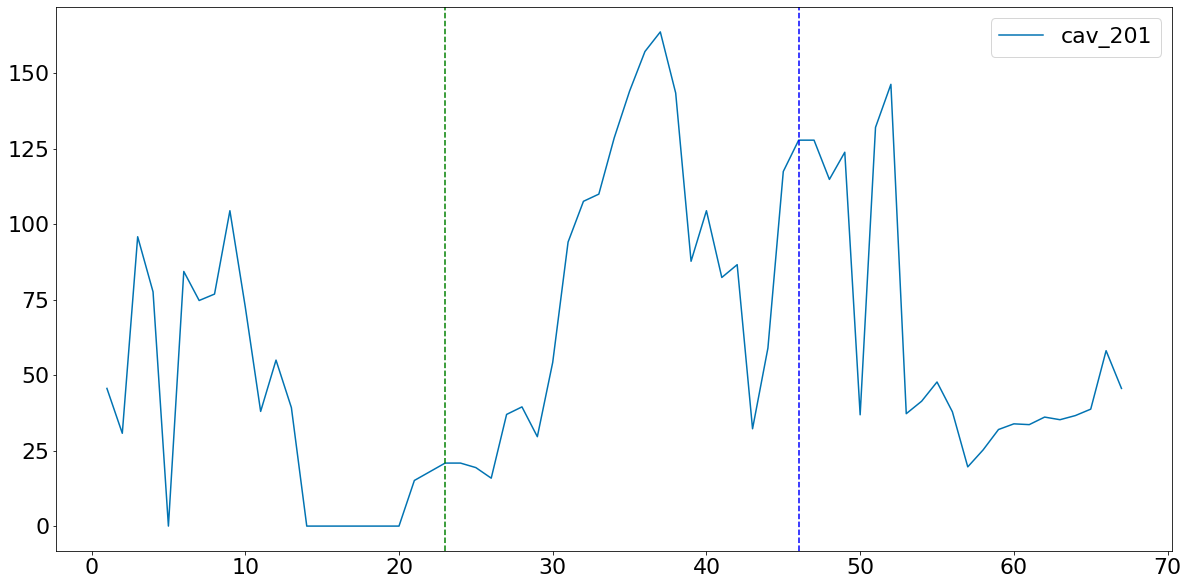

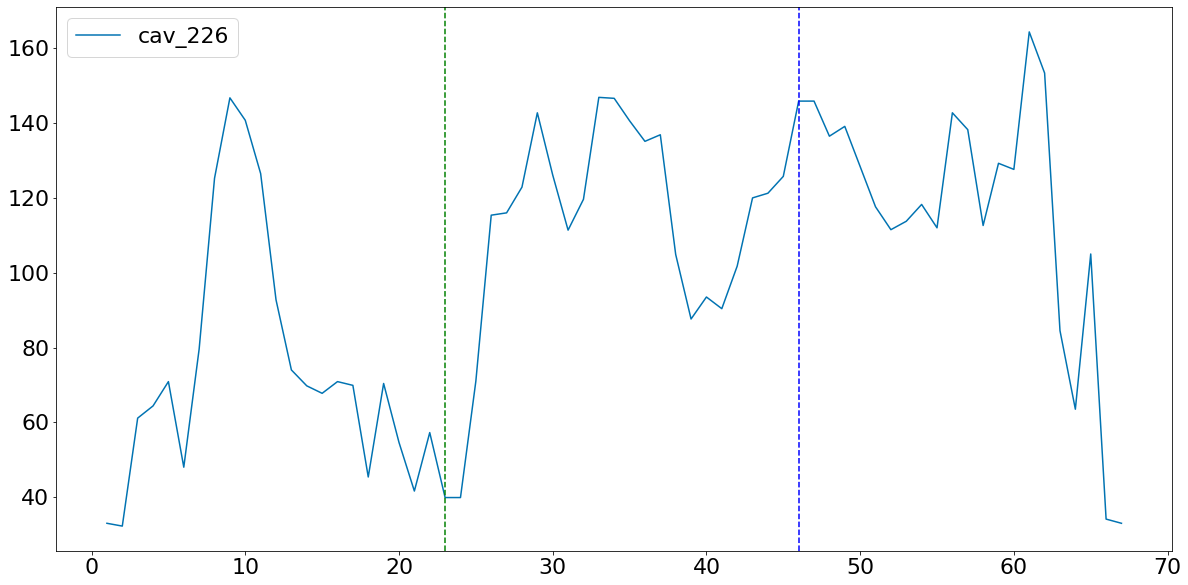

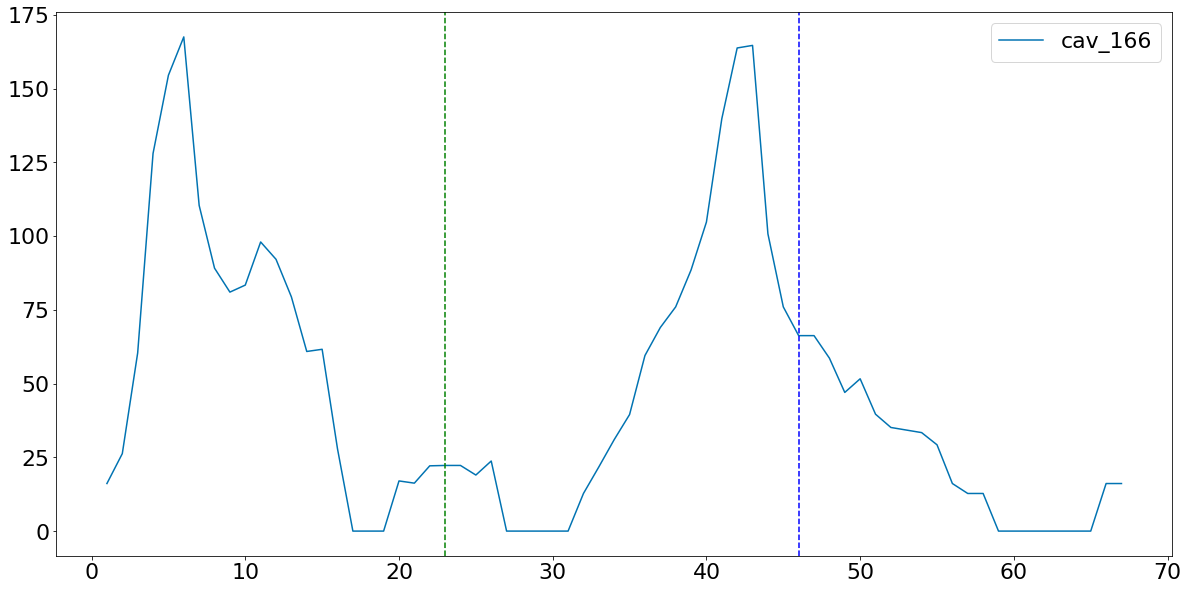

In [186]:
volumes_transposed_transposed_selected['cluster'] = clusters

for cluster in set(clusters):
    print(cluster)
    data = volumes_transposed_transposed_selected[volumes_transposed_transposed_selected['cluster'] == cluster]
    data = data.iloc[:,:-1].T
    data.plot()
    plt.axvline(23, color = 'g', linestyle='--')
    plt.axvline(46, color = 'b', linestyle='--')